In [1]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

# UPDATE 2020-12-31 (my preferred font is Avenir...)
font = {'family' : 'avenir',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)



In [2]:
from finches.forcefields.mPiPi import mPiPi_model

from finches import epsilon_calculation
from finches import epsilon_to_FHtheory
from finches.frontend import mpipi_frontend
from sparrow import Protein

# initialize an Mpipi forcefield opbject
mPiPi_GGv1_model = mPiPi_model('mPiPi_GGv1')

# build an interaction matrix constructor object
IMC_object = epsilon_calculation.Interaction_Matrix_Constructor(mPiPi_GGv1_model)



## FUS LCD
Build phase diagrams for FUS-LCD, FUS-LCD+6E and FUS-LCD+12E as described in Dignon et al. 2018 and Monahan et al. 2017

Monahan, Z., Ryan, V. H., Janke, A. M., Burke, K. A., Rhoads, S. N., Zerze, G. H., O’Meally, R., Dignon, G. L., Conicella, A. E., Zheng, W., Best, R. B., Cole, R. N., Mittal, J., Shewmaker, F. & Fawzi, N. L. Phosphorylation of the FUS low-complexity domain disrupts phase separation, aggregation, and toxicity. EMBO J. 36, 2951–2967 (2017).

Dignon, G. L., Zheng, W., Kim, Y. C., Best, R. B. & Mittal, J. Sequence determinants of protein phase behavior from a coarse-grained model. PLoS Comput. Biol. 14, e1005941 (2018).



In [7]:
# build 6-E variant
sixE_pos = [26, 30, 68, 84, 87, 117]
wt_fus =  'MASNDYTQQATQSYGAYPTQPGQGYSQQSSQPYGQQSYSGYSQSTDTSGYGQSSYSSYGQSQNTGYGTQSTPQGYGSTGGYGSSQSSQSSYGQQSSYPGYGQQPAPSSTSGSYGSSSQSSSYGQPQSGSYSQQPSYGGQQQSYGQQQSYNPPQGYGQQNQYNS'
fus_12e = 'MASNDYEQQAEQSYGAYPEQPGQGYEQQSEQPYGQQSYSGYEQSTDTSGYGQSSYSSYGQEQNTGYGEQSTPQGYGSTGGYGSEQSEQSSYGQQSSYPGYGQQPAPSSTSGSYGSSEQSSSYGQPQSGSYEQQPSYGGQQQSYGQQQSYNPPQGYGQQNQYNS'

fus6E = list(wt_fus)
for p in sixE_pos:
    fus6E[p-1] = 'E'

fus6E = "".join(fus6E)



(0.7, 1.05)

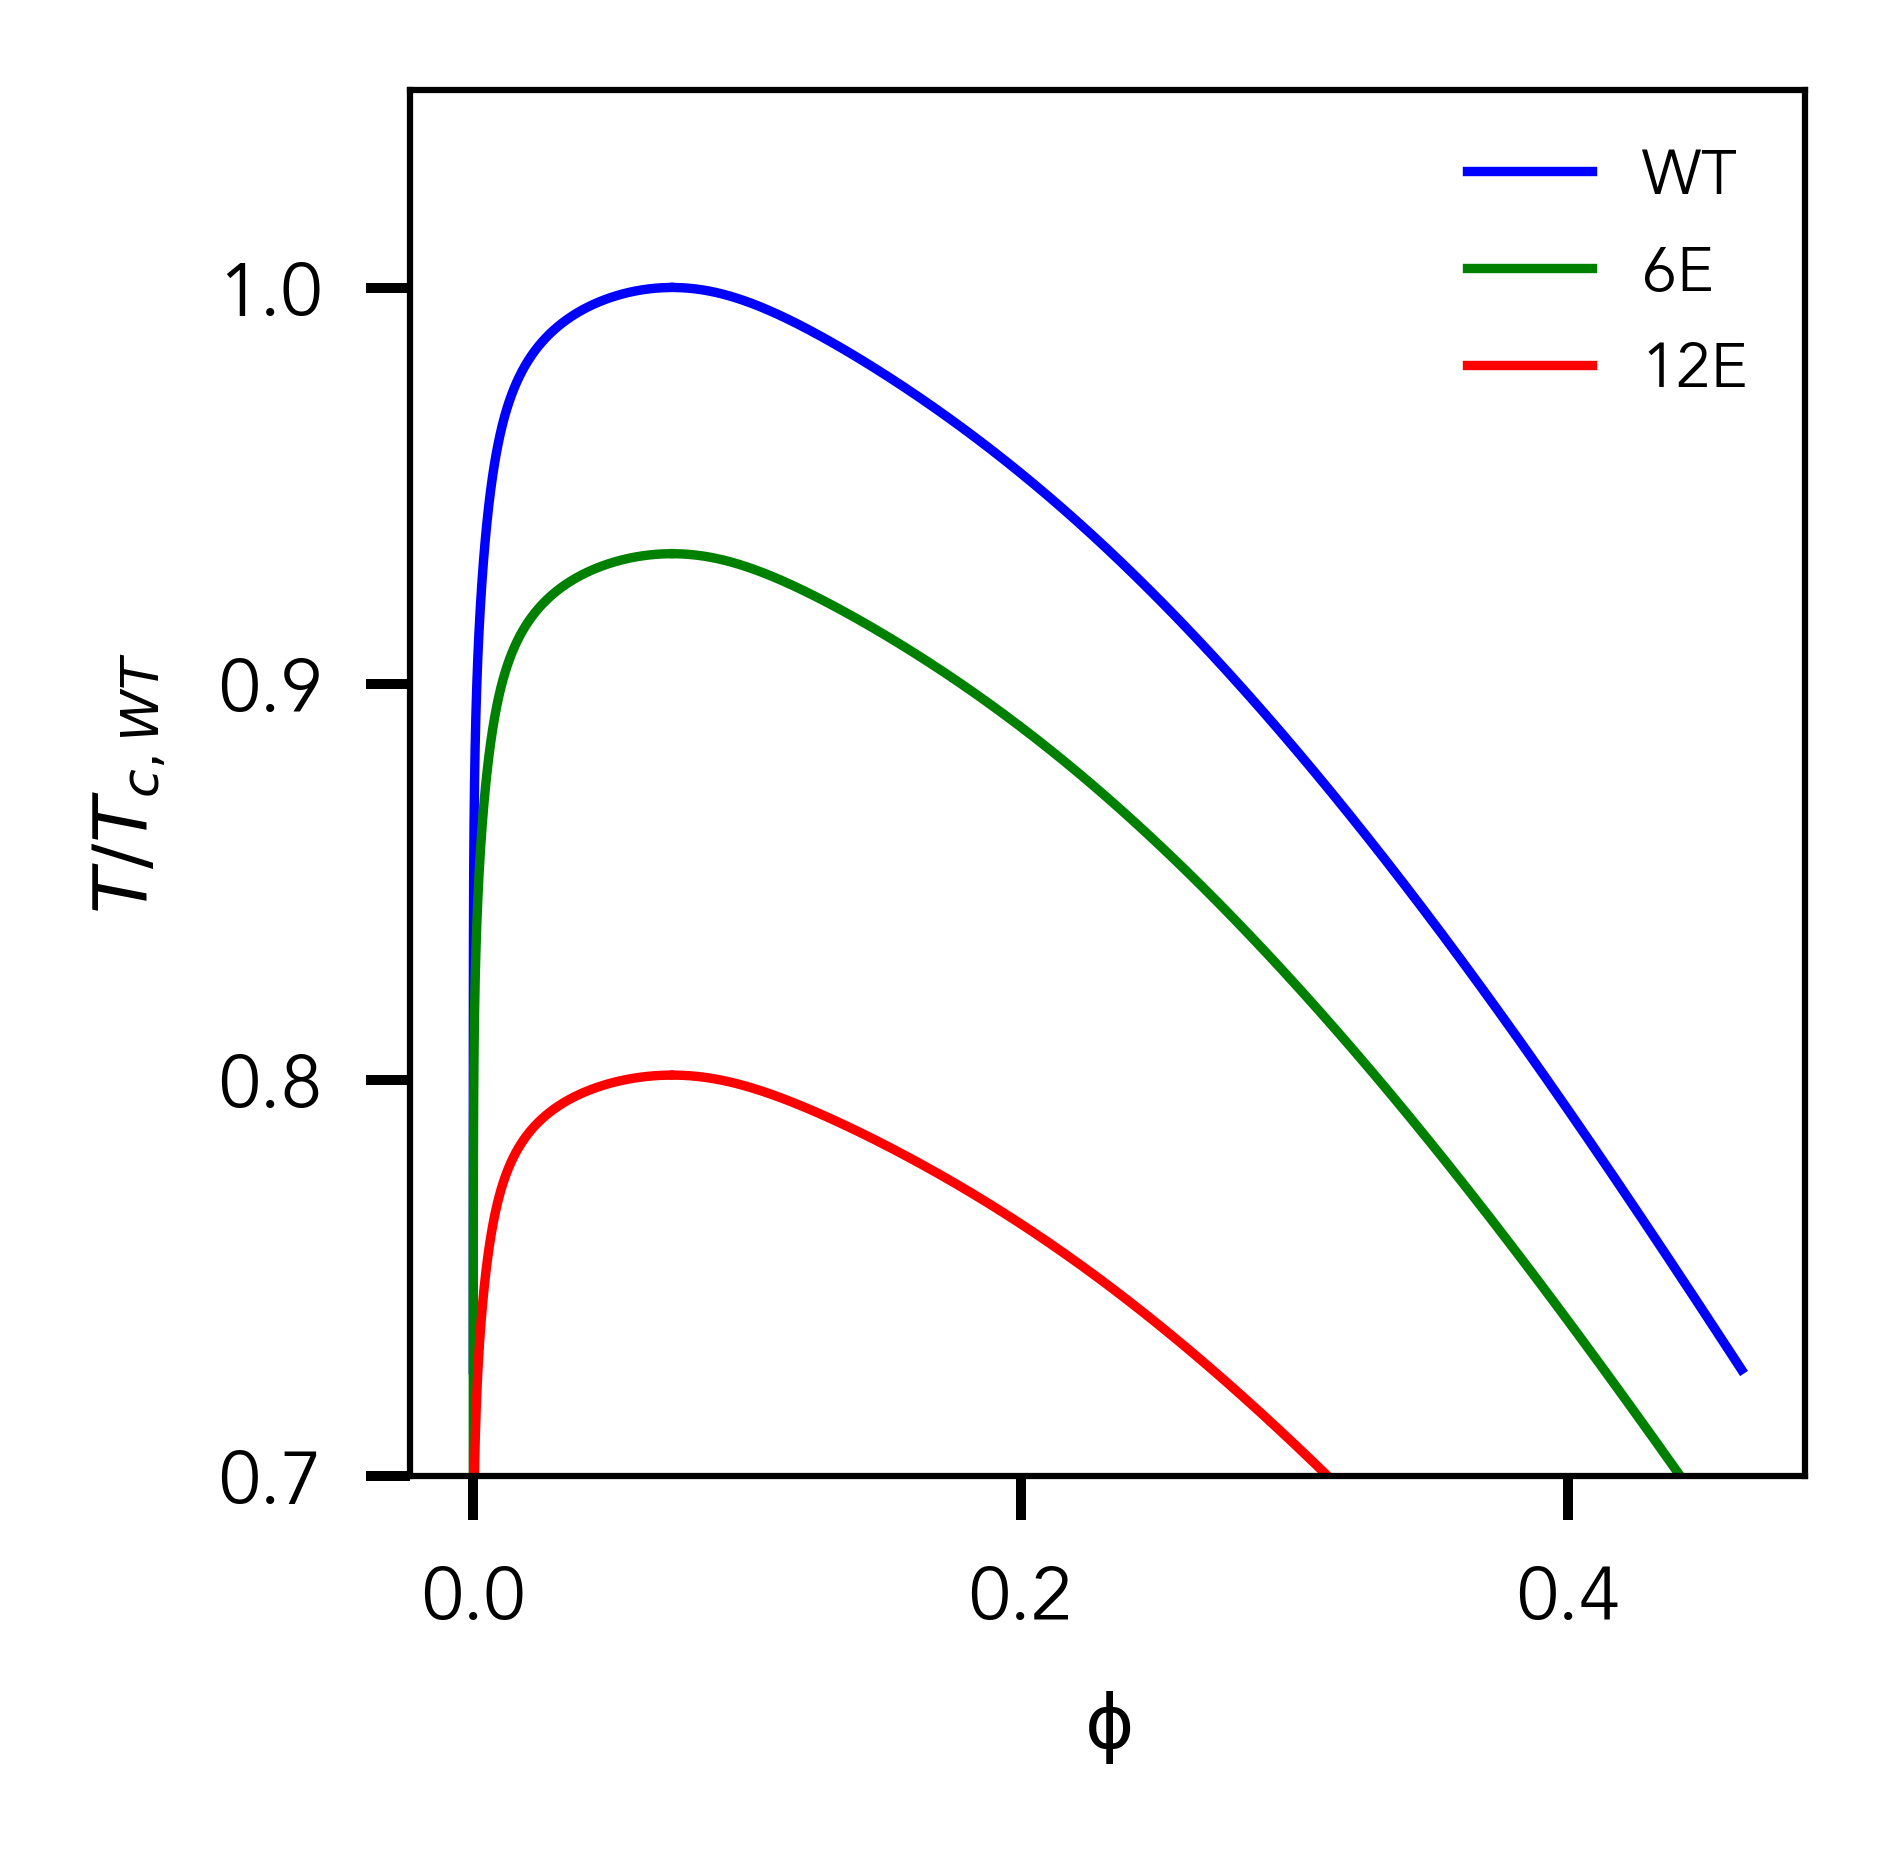

In [8]:
fig = plt.figure(figsize=(2, 2), dpi=450)

B1 = epsilon_to_FHtheory.return_phase_diagram('MASNDYTQQATQSYGAYPTQPGQGYSQQSSQPYGQQSYSGYSQSTDTSGYGQSSYSSYGQSQNTGYGTQSTPQGYGSTGGYGSSQSSQSSYGQQSSYPGYGQQPAPSSTSGSYGSSSQSSSYGQPQSGSYSQQPSYGGQQQSYGQQQSYNPPQGYGQQNQYNS', IMC_object)
plt.plot(B1[0], B1[3]/max(B1[3]), 'blue', label='WT', linewidth=0.75)
plt.plot(B1[1], B1[3]/max(B1[3]), 'blue',linewidth=0.75)

B3 = epsilon_to_FHtheory.return_phase_diagram(fus6E, IMC_object)
plt.plot(B3[0], B3[3]/max(B1[3]),'green', label='6E',linewidth=0.75)
plt.plot(B3[1], B3[3]/max(B1[3]),'green',linewidth=0.75)

B2 = epsilon_to_FHtheory.return_phase_diagram(fus_12e, IMC_object)
plt.plot(B2[0], B2[3]/max(B1[3]),'r', label='12E',linewidth=0.75)
plt.plot(B2[1], B2[3]/max(B1[3]),'r',linewidth=0.75)
plt.ylabel(r'$T/T_{c,WT}$', fontsize=6)
plt.xlabel(r'$\rm\phi$', fontsize=6)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.legend(fontsize=5, frameon=False)
plt.ylim([0.7, 1.05])

# hNRNPA1 aromatic variants 
Build phase diagrams for hnRNA1 LCD with different flavors of aromatic residues as described by Bremer et al. 2020

Bremer, A., Farag, M., Borcherds, W. M., Peran, I., Martin, E. W., Pappu, R. V. & Mittag, T. Deciphering how naturally occurring sequence features impact the phase behaviours of disordered prion-like domains. Nat. Chem. 14, 196–207 (2022).


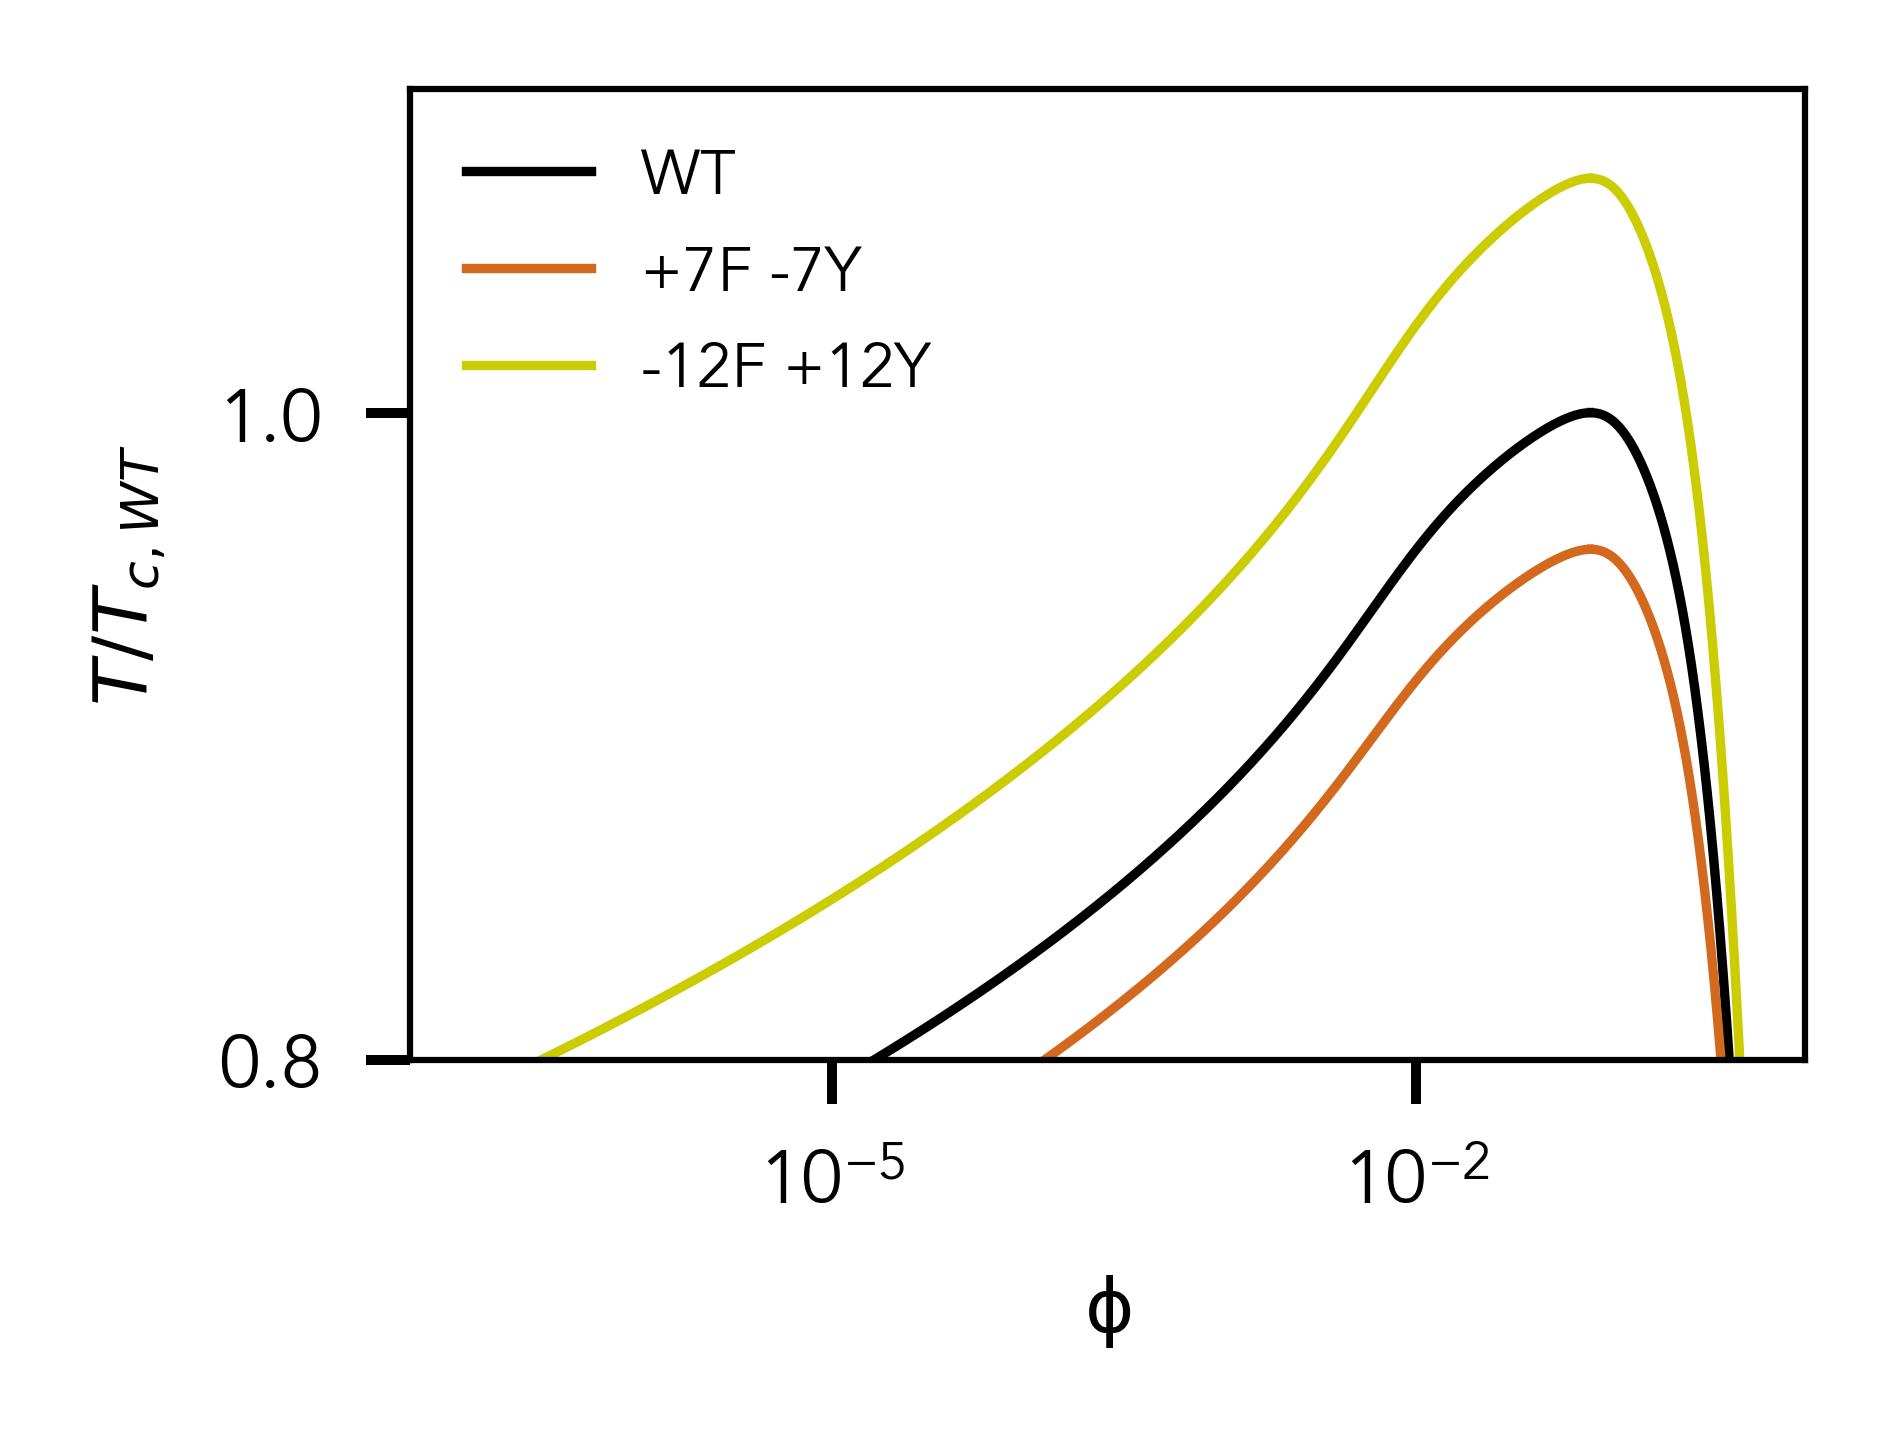

In [9]:
fig = plt.figure(figsize=(2, 1.4), dpi=450)

B1 = epsilon_to_FHtheory.return_phase_diagram('GSMASASSSQRGRSGSGNFGGGRGGGFGGNDNFGRGGNFSGRGGFGGSRGGGGYGGSGDGYNGFGNDGSNFGGGGSYNDFGNYNNQSSNFGPMKGGNFGGRSSGGSGGGGQYFAKPRNQGGYGGSSSSSSYGSGRRF', IMC_object)
plt.plot(B1[0], B1[3]/max(B1[3]), 'k', label='WT', linewidth=0.75)
plt.plot(B1[1], B1[3]/max(B1[3]), 'k',linewidth=0.75)


B2 = epsilon_to_FHtheory.return_phase_diagram('GSMASASSSQRGRSGSGNFGGGRGGGFGGNDNFGRGGNFSGRGGFGGSRGGGGFGGSGDGFNGFGNDGSNFGGGGSFNDFGNFNNQSSNFGPMKGGNFGGRSSGGSGGGGQFFAKPRNQGGFGGSSSSSSFGSGRRF', IMC_object)
plt.plot(B2[0], B2[3]/max(B1[3]),'#D3691E', label='+7F -7Y',linewidth=0.75)
plt.plot(B2[1], B2[3]/max(B1[3]),'#D3691E',linewidth=0.75)

B3 = epsilon_to_FHtheory.return_phase_diagram('GSMASASSSQRGRSGSGNYGGGRGGGYGGNDNYGRGGNYSGRGGYGGSRGGGGYGGSGDGYNGYGNDGSNYGGGGSYNDYGNYNNQSSNYGPMKGGNYGGRSSGGSGGGGQYYAKPRNQGGYGGSSSSSSYGSGRRY', IMC_object)
plt.plot(B3[0], B3[3]/max(B1[3]), color='#CCCC02',label='-12F +12Y',linewidth=0.75)
plt.plot(B3[1], B3[3]/max(B1[3]),'#CCCC02',linewidth=0.75)

plt.ylabel(r'$T/T_{c,WT}$', fontsize=6)
plt.xlabel(r'$\rm\phi$', fontsize=6)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.legend(fontsize=5, frameon=False)
plt.ylim([0.8, 1.1])
plt.xscale('log')

# hNRNPA1 aromatic variants  V2
Build phase diagrams for hnRNA1 LCD with different NUMBERS of aromatic residues as described by Martin/Holehouse/Peran et al. 2020



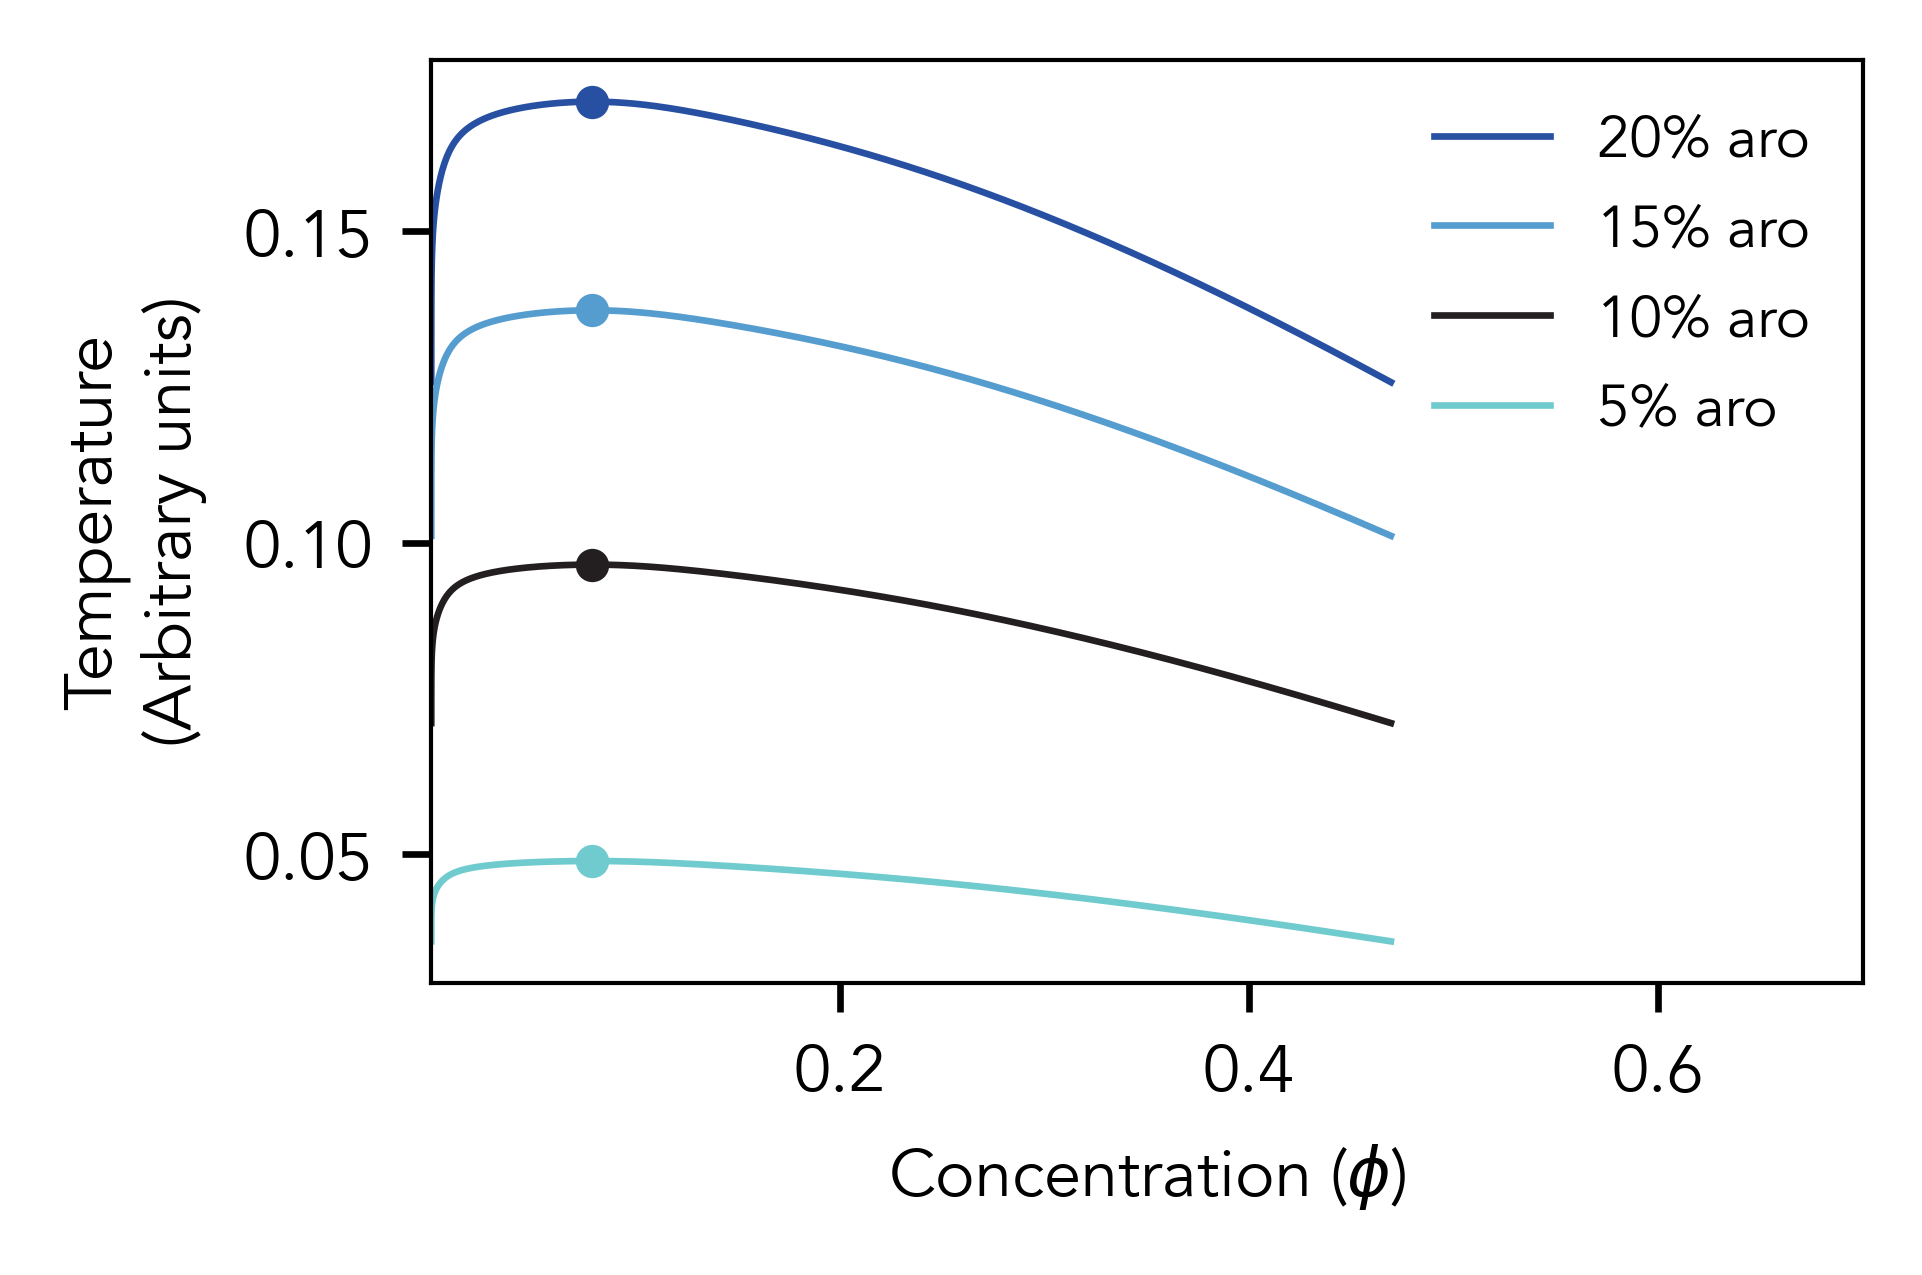

In [10]:

# note the [::-1] which reverses the order so the sequences descend from highes-to-lowest aromatic fraction
# when plotting
a1_seqs = ['GSMASASSSQRGRSGSGNSGGGRGGGFGGNDNSGRGGNSSGRGGFGGSRGGGGSGGSGDGYNGSGNDGSNSGGGGSSNDFGNSNNQSSNSGPMKGGNFGGRSSGGSGGGGQYSAKPRNQGGSGGSSSSSSSGSGRRS',
'GSMASASSSQRGRSGSGNSGGGRGGGFGGNDNFGRGGNSSGRGGFGGSRGGGGYGGSGDGYNGFGNDGSNSGGGGSSNDFGNYNNQSSNFGPMKGGNFGGRSSGGSGGGGQYSAKPRNQGGYGGSSSSSSSGSGRRF',
'GSMASASSSQRGRSGSGNFGGGRGGGFGGNDNFGRGGNFSGRGGFGGSRGGGGYGGSGDGYNGFGNDGSNFGGGGSYNDFGNYNNQSSNFGPMKGGNFGGRSSGGSGGGGQYFAKPRNQGGYGGSSSSSSYGSGRRF',
'GSMAFASSFQRGRYGSGNFGGGRGGGFGGNDNFGRGGNFSGRGGFGGSRGGGGYGGSGDGYNGFGNDGSNFGGGGSYNDFGNYNNQSSNFGPMKGGNFGGRSSGGSYGGGQYFAKPRNQGGYGGSSFSSSYGSGRRF',][::-1]



figure(num=None, figsize=(3.0, 2.05), dpi=300, facecolor='w', edgecolor='k')
ax = plt.gca()

colors = {}
colors[0] = '#274fa2'
colors[1] = '#559ccf'
colors[2] = '#231f20'
colors[3] = '#70cbce'


names = {}
names[0] = '20% aro'
names[1] = '15% aro'
names[2] = '10% aro'
names[3] = '5% aro'

for idx, d in enumerate(a1_seqs):

    XOUT = epsilon_to_FHtheory.return_phase_diagram(d, IMC_object)

    plt.plot(XOUT[0], XOUT[3],'-', color=colors[idx],linewidth=0.8)
    plt.plot(XOUT[1],XOUT[3],'-', color=colors[idx],linewidth=0.8, label=names[idx])    
    plt.plot(XOUT[2][0], XOUT[2][1],'.', color=colors[idx],linewidth=0.5, ms=8,  mew=0)    
    

plt.legend(fontsize=7, frameon=False)

plt.xlim ([0.0000005,0.7])

## uncomment to show as log slcae
#plt.xscale('log')

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.xlabel(r'Concentration ($\phi$)', fontsize=8)
plt.ylabel('Temperature\n(Arbitrary units)', fontsize=8)
plt.savefig('A1_phase_diagram.pdf')




## DDX4 salt dependency
DDX4 salt dependency as described by Brady et al.

Brady, J. P., Farber, P. J., Sekhar, A., Lin, Y.-H., Huang, R., Bah, A., Nott, T. J., Chan, H. S., Baldwin, A. J., Forman-Kay, J. D. & Kay, L. E. Structural and hydrodynamic properties of an intrinsically disordered region of a germ cell-specific protein on phase separation. Proc. Natl. Acad. Sci. U. S. A. 114, E8194–E8203 (2017).

(0.4, 1.5)

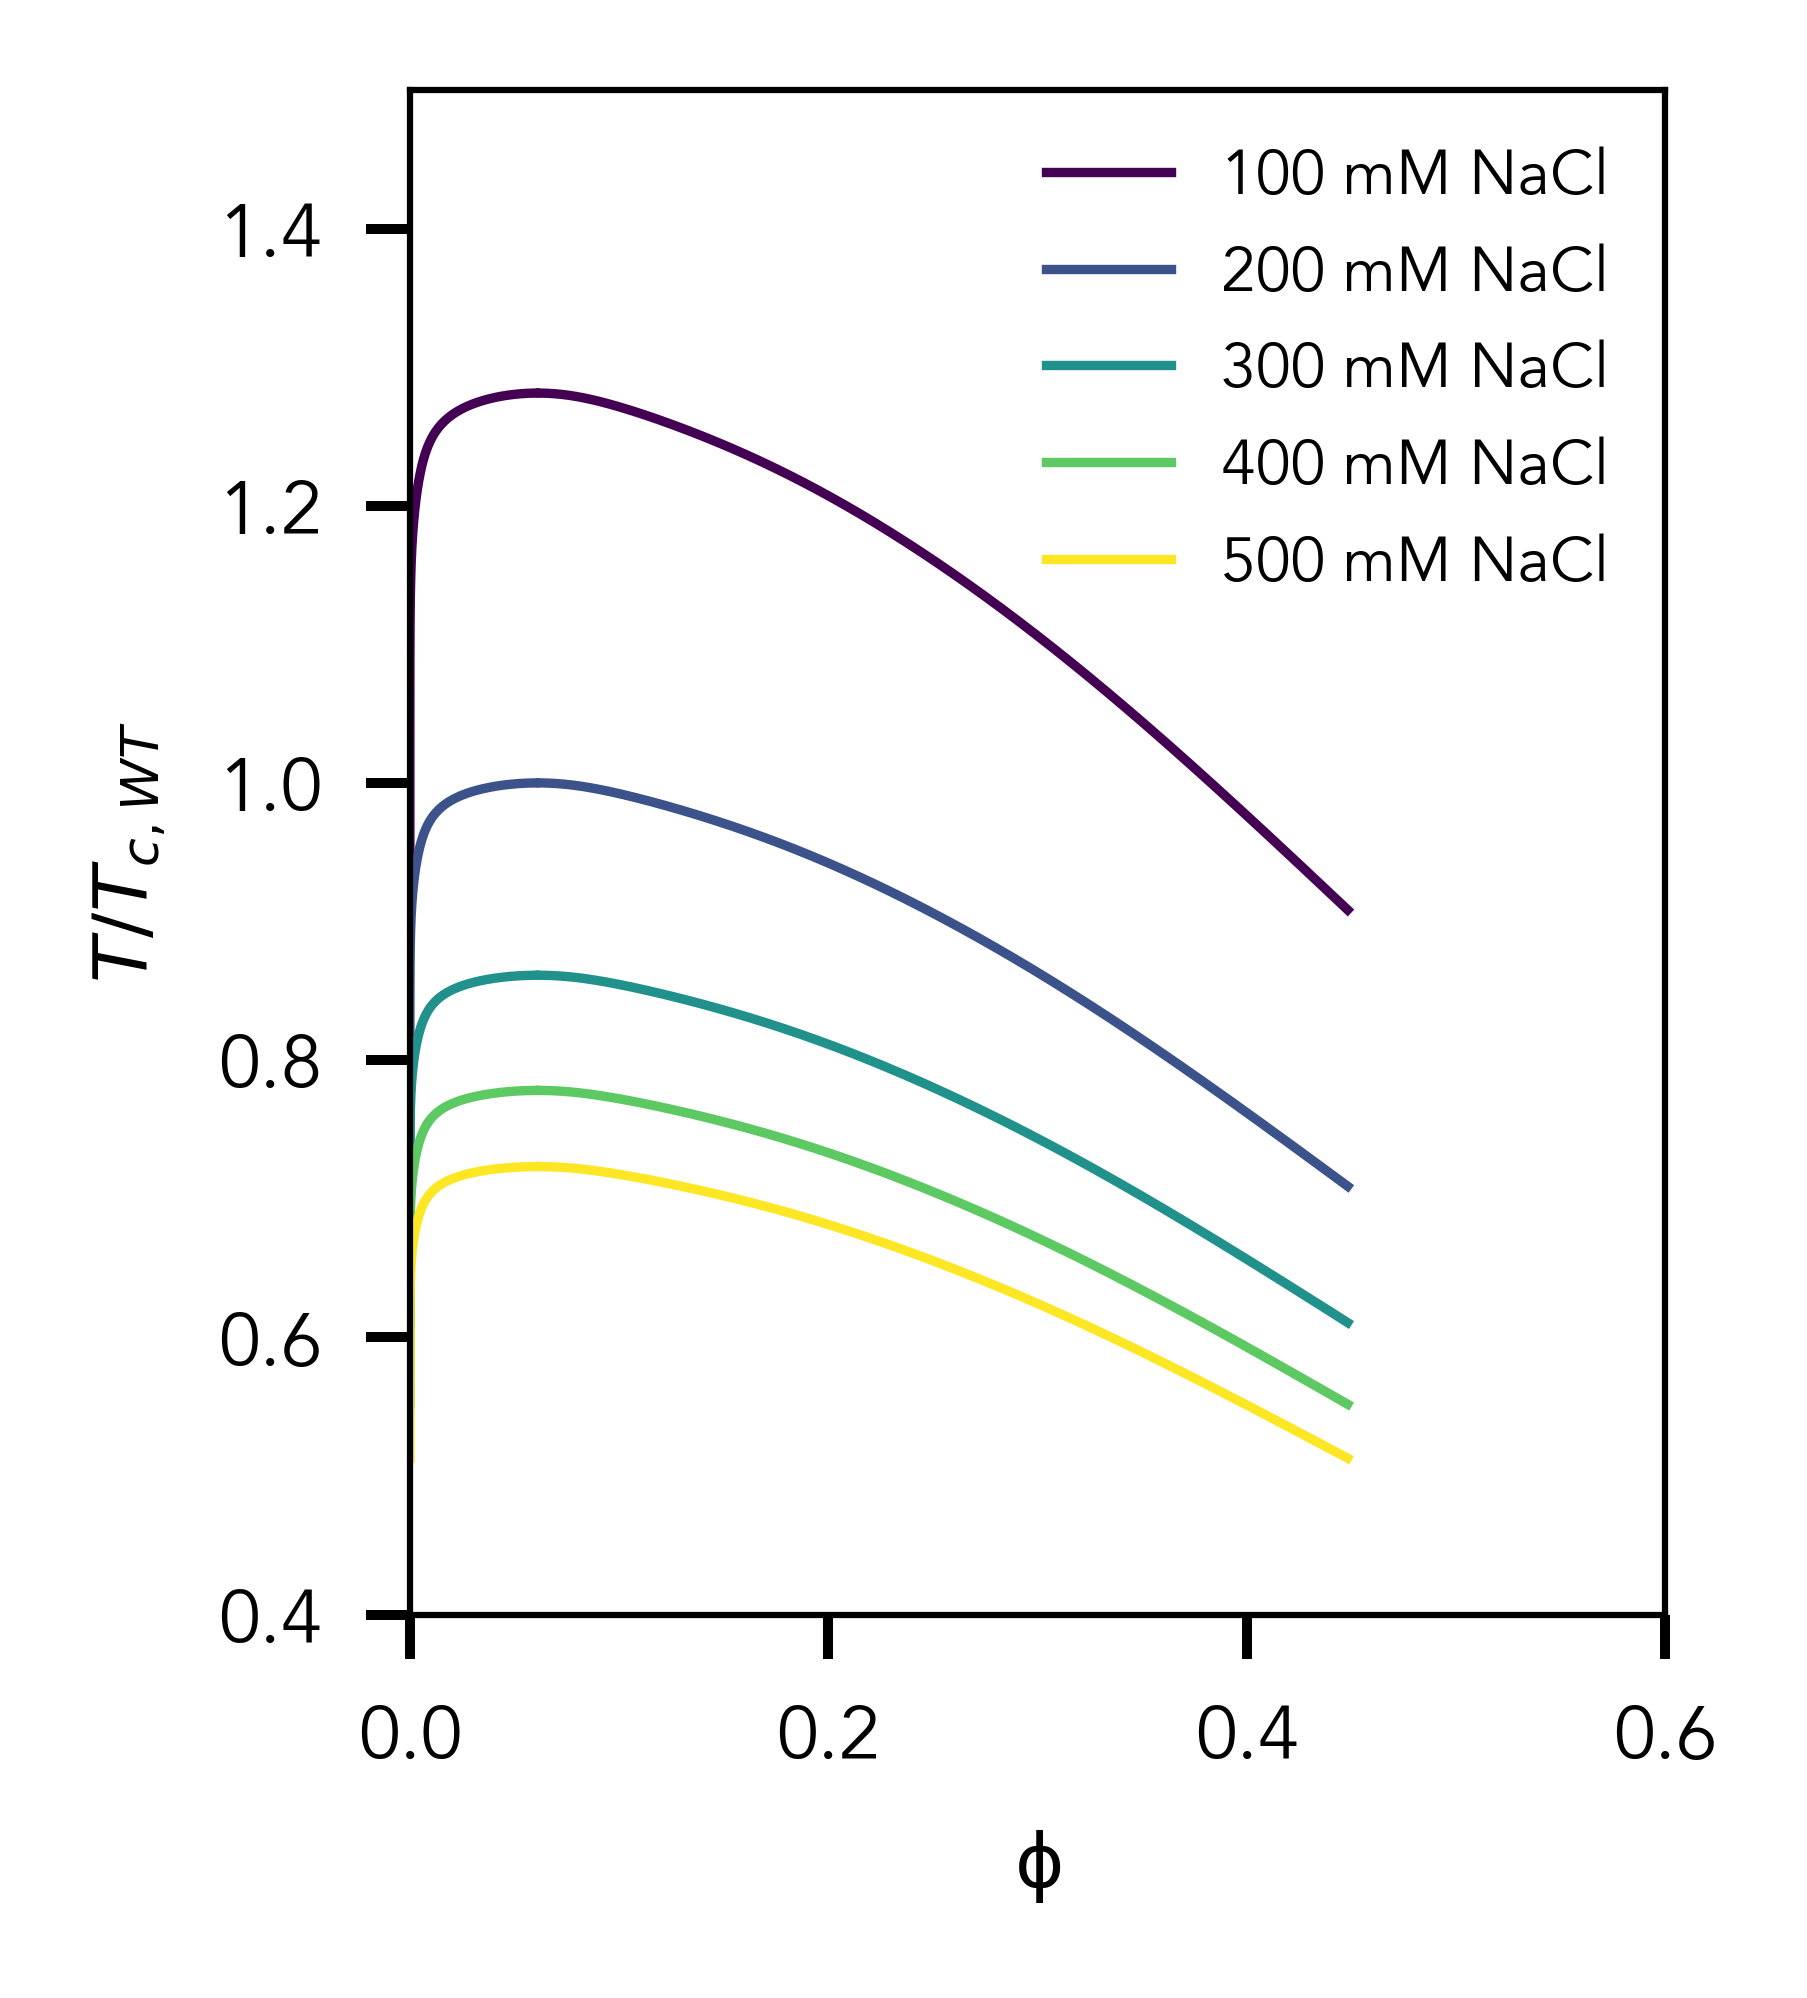

In [11]:
fig = plt.figure(figsize=(1.8, 2.2), dpi=450)


DDX4_WT = 'MGDEDWEAEINPHMSSYVPIFEKDRYSGENGDNFNRTPASSSEMDDGPSRRDHFMKSGFASGRNFGNRDAGECNKRDNTSTMGGFGVGKSFGNRGFSNSRFEDGDSSGFWRESSNDCEDNPTRNRGFSKRGGYRDGNNSEASGPYRRGGRGSFRGCRGGFGLGSPNNDLDPDECMQRTGGLFGSRRPVLSGTGNGDTSQSRSGSGSERGGYKGLNEEVITGSGKNSWKSEAEGGES'

mPiPi_GGv1_model = mPiPi_model('mPiPi_GGv1',salt=0.2)
IMC_object = epsilon_calculation.Interaction_Matrix_Constructor(mPiPi_GGv1_model)

B_base = epsilon_to_FHtheory.return_phase_diagram(DDX4_WT, IMC_object)



# initialize an Mpipi forcefield opbject
mPiPi_GGv1_model = mPiPi_model('mPiPi_GGv1',salt=0.1)
IMC_object = epsilon_calculation.Interaction_Matrix_Constructor(mPiPi_GGv1_model)


B1 = epsilon_to_FHtheory.return_phase_diagram(DDX4_WT, IMC_object)
plt.plot(B1[0], B1[3]/max(B_base[3]), '#440154', label='100 mM NaCl', linewidth=0.75)
plt.plot(B1[1], B1[3]/max(B_base[3]), '#440154',linewidth=0.75)

mPiPi_GGv1_model = mPiPi_model('mPiPi_GGv1',salt=0.2)
IMC_object = epsilon_calculation.Interaction_Matrix_Constructor(mPiPi_GGv1_model)

B2 = epsilon_to_FHtheory.return_phase_diagram(DDX4_WT, IMC_object)
plt.plot(B2[0], B2[3]/max(B_base[3]), '#3B528B', label='200 mM NaCl', linewidth=0.75)
plt.plot(B2[1], B2[3]/max(B_base[3]), '#3B528B',linewidth=0.75)

mPiPi_GGv1_model = mPiPi_model('mPiPi_GGv1',salt=0.3)
IMC_object = epsilon_calculation.Interaction_Matrix_Constructor(mPiPi_GGv1_model)

B3 = epsilon_to_FHtheory.return_phase_diagram(DDX4_WT, IMC_object)
plt.plot(B3[0], B3[3]/max(B_base[3]), '#21918C', label='300 mM NaCl', linewidth=0.75)
plt.plot(B3[1], B3[3]/max(B_base[3]), '#21918C',linewidth=0.75)

mPiPi_GGv1_model = mPiPi_model('mPiPi_GGv1',salt=0.4)
IMC_object = epsilon_calculation.Interaction_Matrix_Constructor(mPiPi_GGv1_model)

B4 = epsilon_to_FHtheory.return_phase_diagram(DDX4_WT, IMC_object)
plt.plot(B4[0], B4[3]/max(B_base[3]), '#5DC962', label='400 mM NaCl', linewidth=0.75)
plt.plot(B4[1], B4[3]/max(B_base[3]), '#5DC962',linewidth=0.75)

mPiPi_GGv1_model = mPiPi_model('mPiPi_GGv1',salt=0.5)
IMC_object = epsilon_calculation.Interaction_Matrix_Constructor(mPiPi_GGv1_model)

B5 = epsilon_to_FHtheory.return_phase_diagram(DDX4_WT, IMC_object)
plt.plot(B5[0], B5[3]/max(B_base[3]), '#FDE724', label='500 mM NaCl', linewidth=0.75)
plt.plot(B5[1], B5[3]/max(B_base[3]), '#FDE724',linewidth=0.75)



plt.ylabel(r'$T/T_{c,WT}$', fontsize=6)
plt.xlabel(r'$\rm\phi$', fontsize=6)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.legend(fontsize=5, frameon=False)
plt.xlim([0, 0.6])
plt.ylim([0.4, 1.5])


In [12]:
DDX4_WT = 'MGDEDWEAEINPHMSSYVPIFEKDRYSGENGDNFNRTPASSSEMDDGPSRRDHFMKSGFASGRNFGNRDAGECNKRDNTSTMGGFGVGKSFGNRGFSNSRFEDGDSSGFWRESSNDCEDNPTRNRGFSKRGGYRDGNNSEASGPYRRGGRGSFRGCRGGFGLGSPNNDLDPDECMQRTGGLFGSRRPVLSGTGNGDTSQSRSGSGSERGGYKGLNEEVITGSGKNSWKSEAEGGES'
DDX4_CS = 'MGDRDWRAEINPHMSSYVPIFEKDRYSGENGRNFNDTPASSSEMRDGPSERDHFMKSGFASGDNFGNRDAGKCNERDNTSTMGGFGVGKSFGNEGFSNSRFERGDSSGFWRESSNDCRDNPTRNDGFSDRGGYEKGNNSEASGPYERGGRGSFDGCRGGFGLGSPNNRLDPRECMQRTGGLFGSDRPVLSGTGNGDTSQSRSGSGSERGGYKGLNEKVITGSGENSWKSEARGGES'
DDX4_F2A = DDX4_WT.replace('F','A')


(<Figure size 2975x2975 with 4 Axes>,
 <AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>)

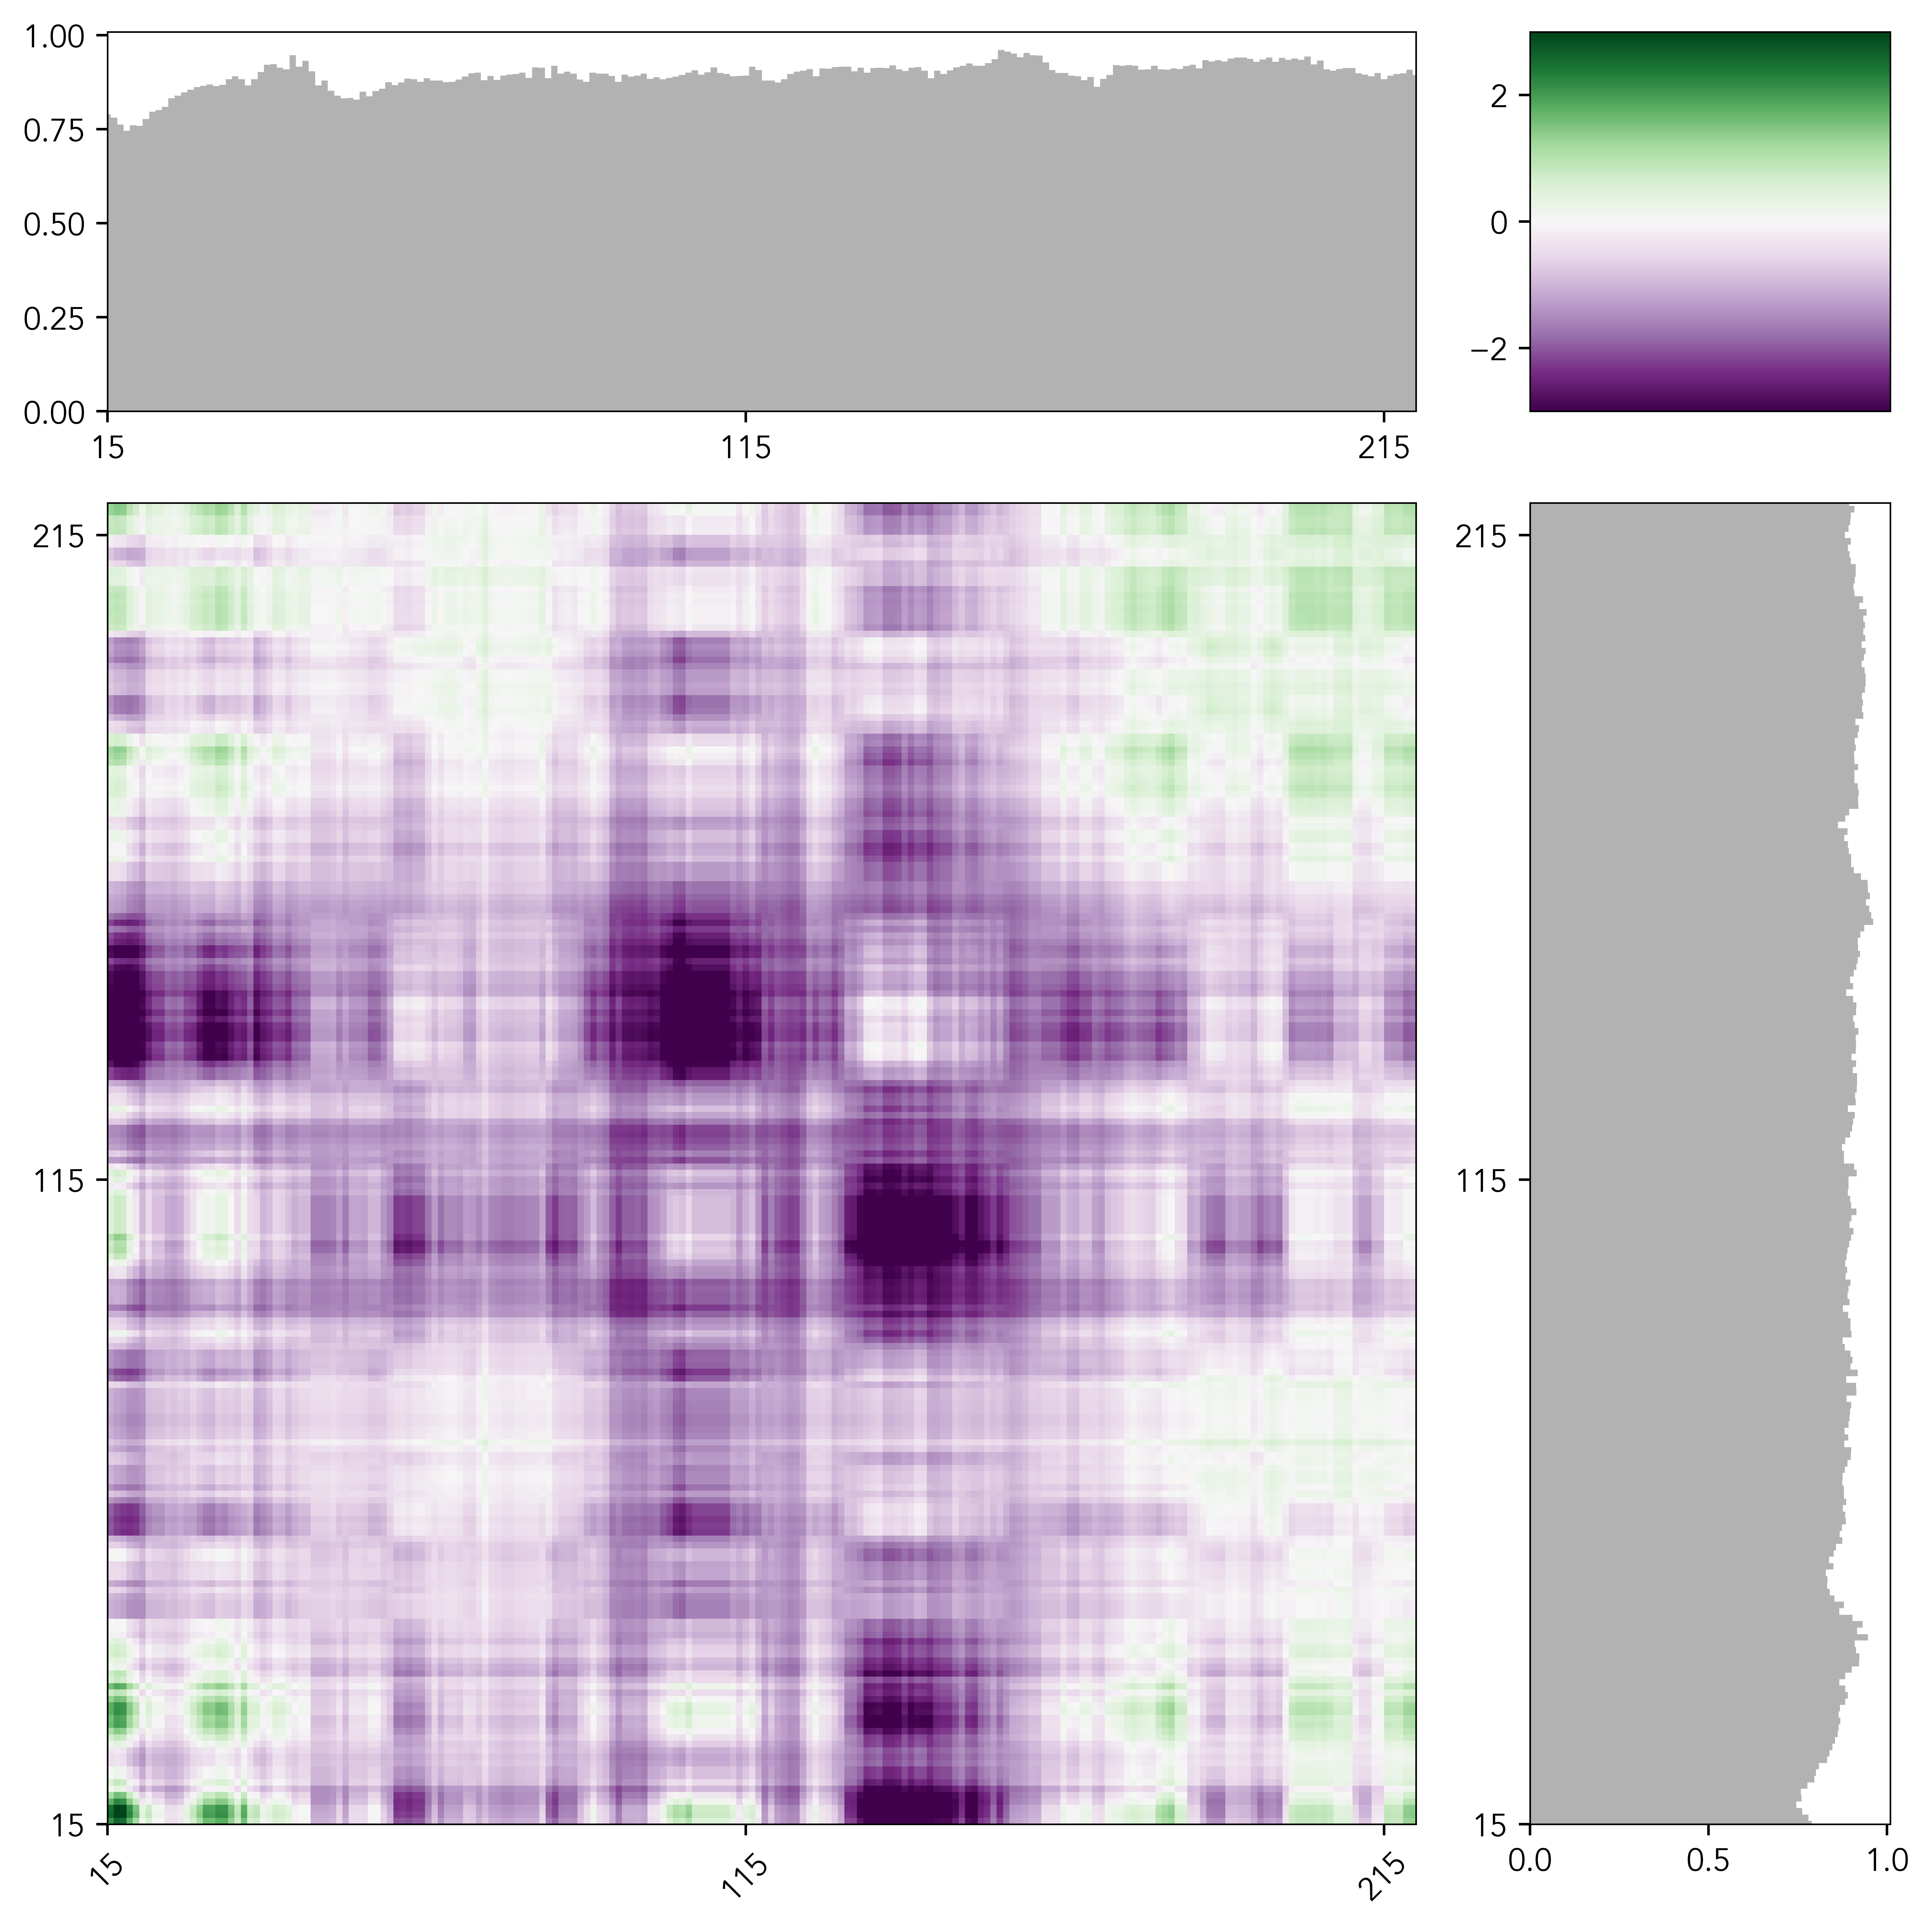

In [14]:


mpipi_frontend.interaction_figure(DDX4_WT,DDX4_WT)



(<Figure size 2975x2975 with 4 Axes>,
 <AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>)

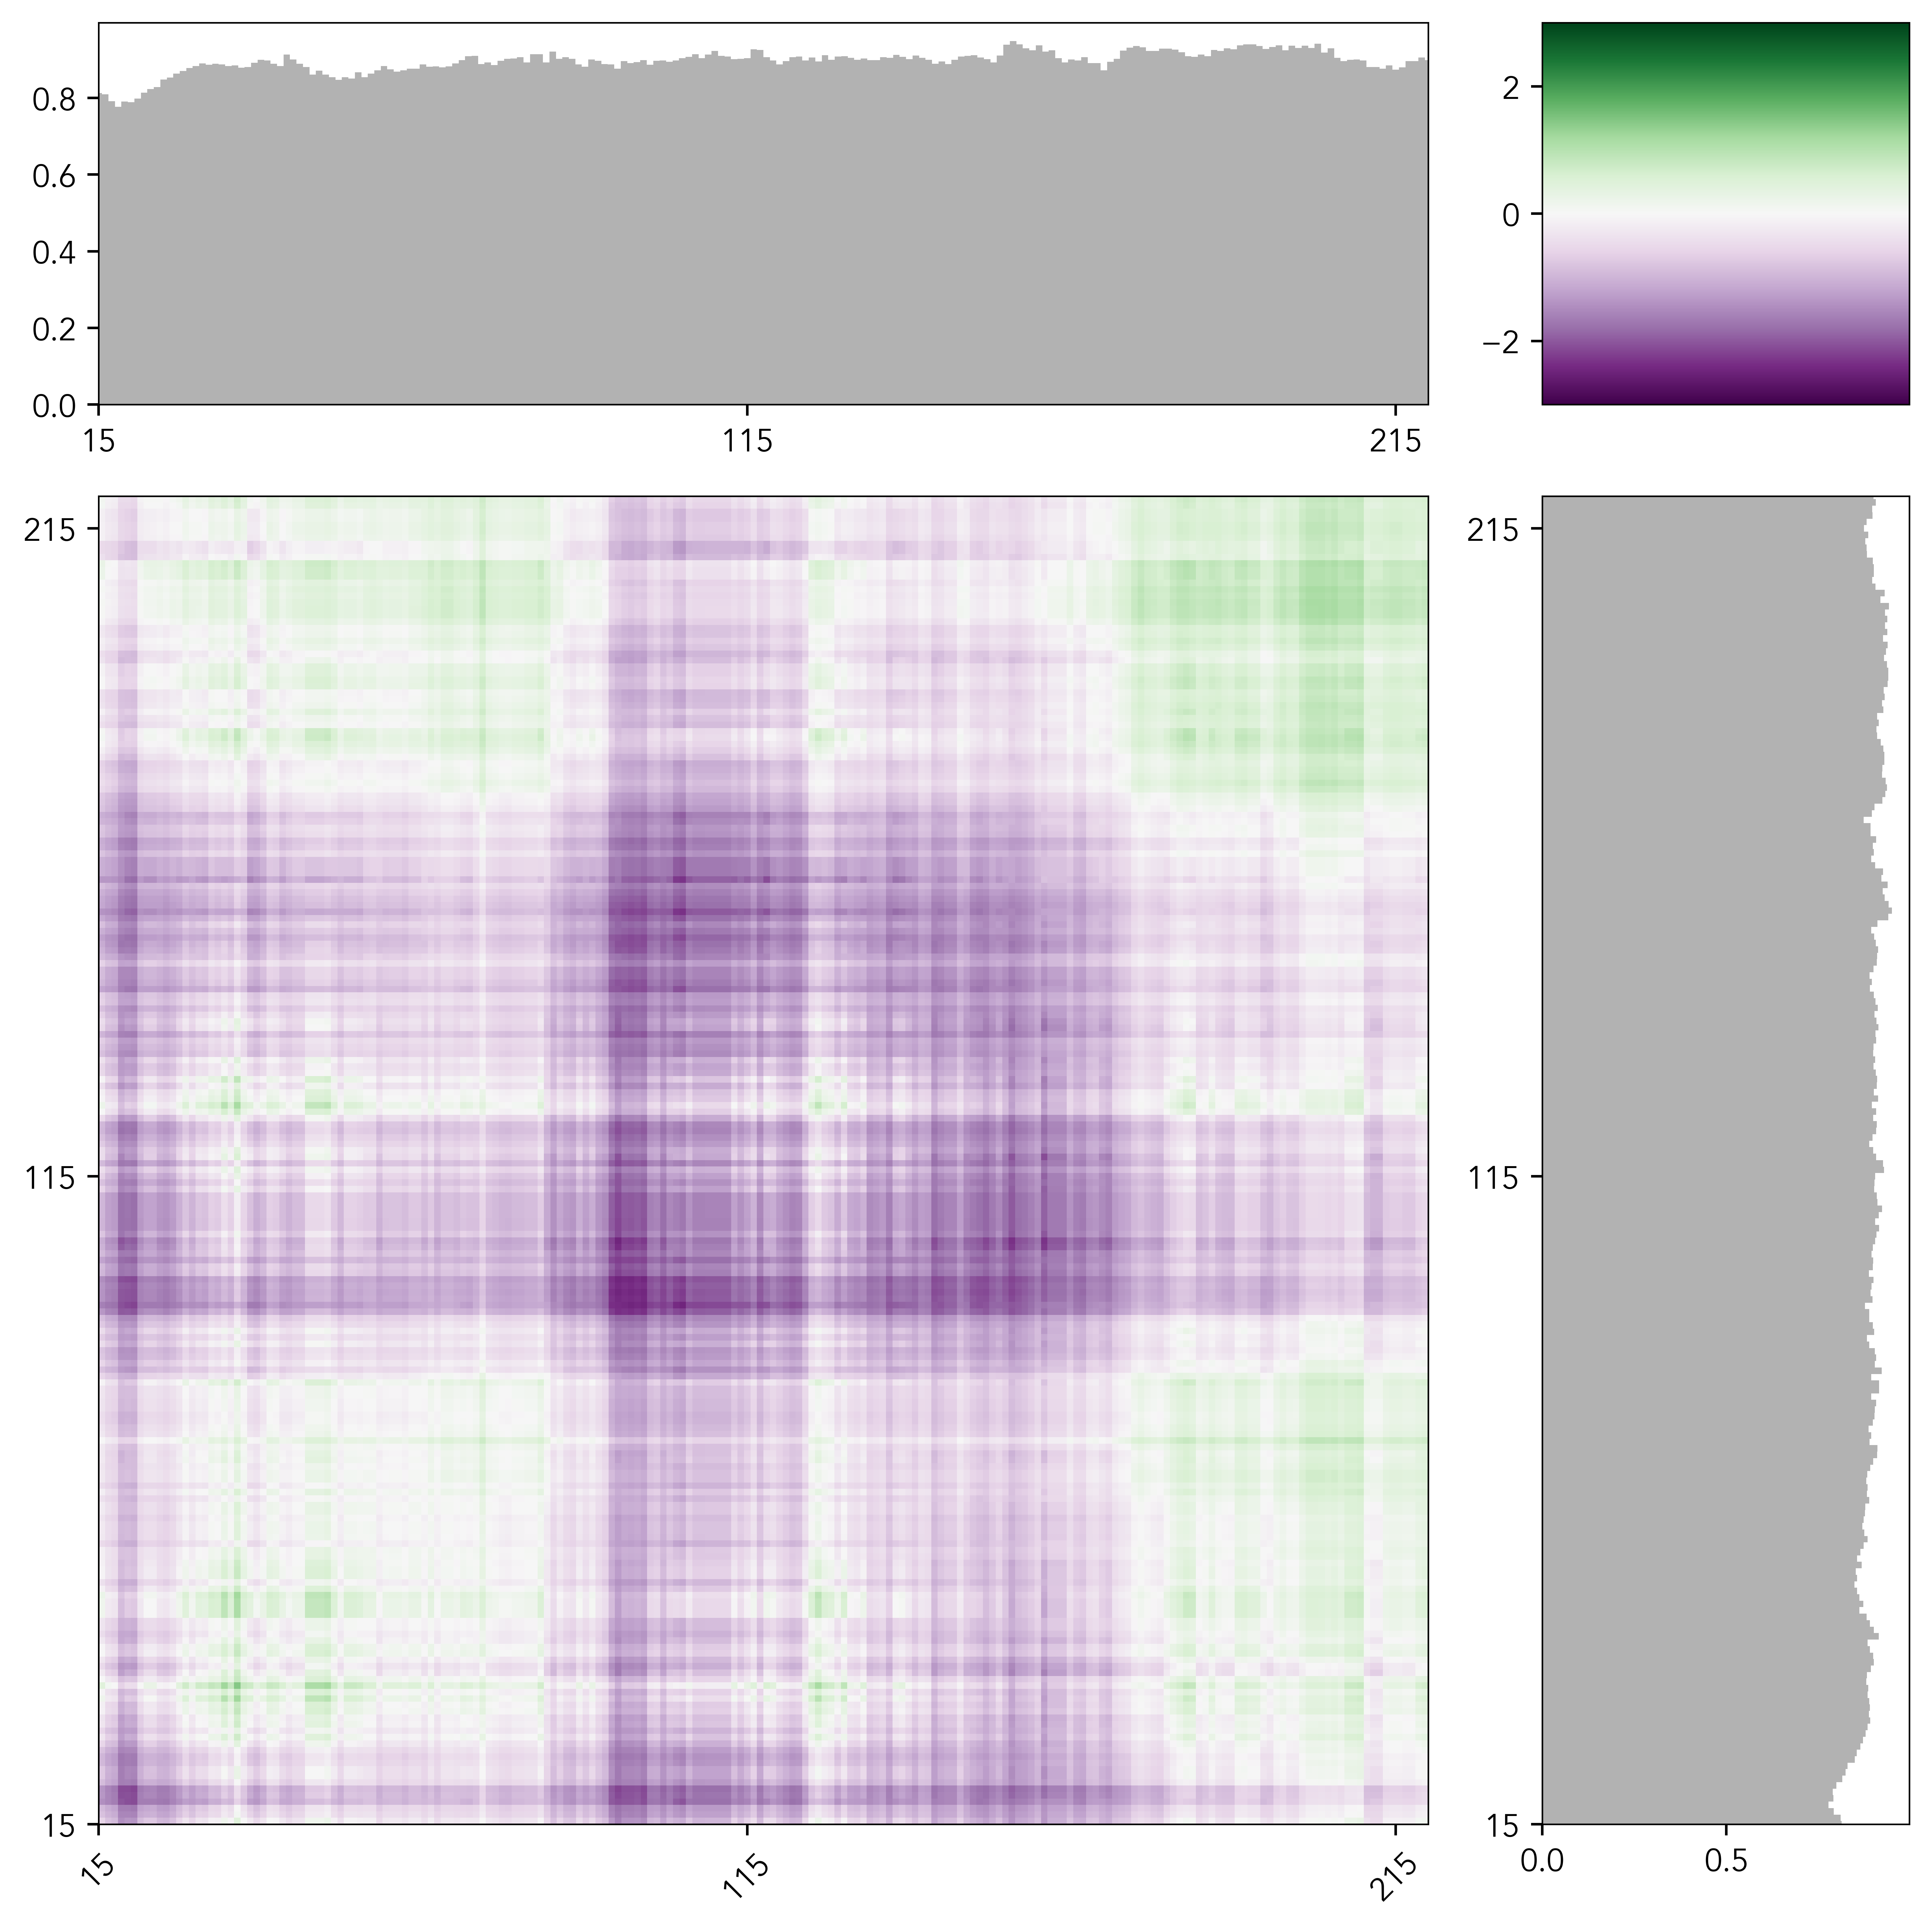

In [15]:

mpipi_frontend.interaction_figure(DDX4_CS, DDX4_CS)



(<Figure size 2975x2975 with 4 Axes>,
 <AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>)

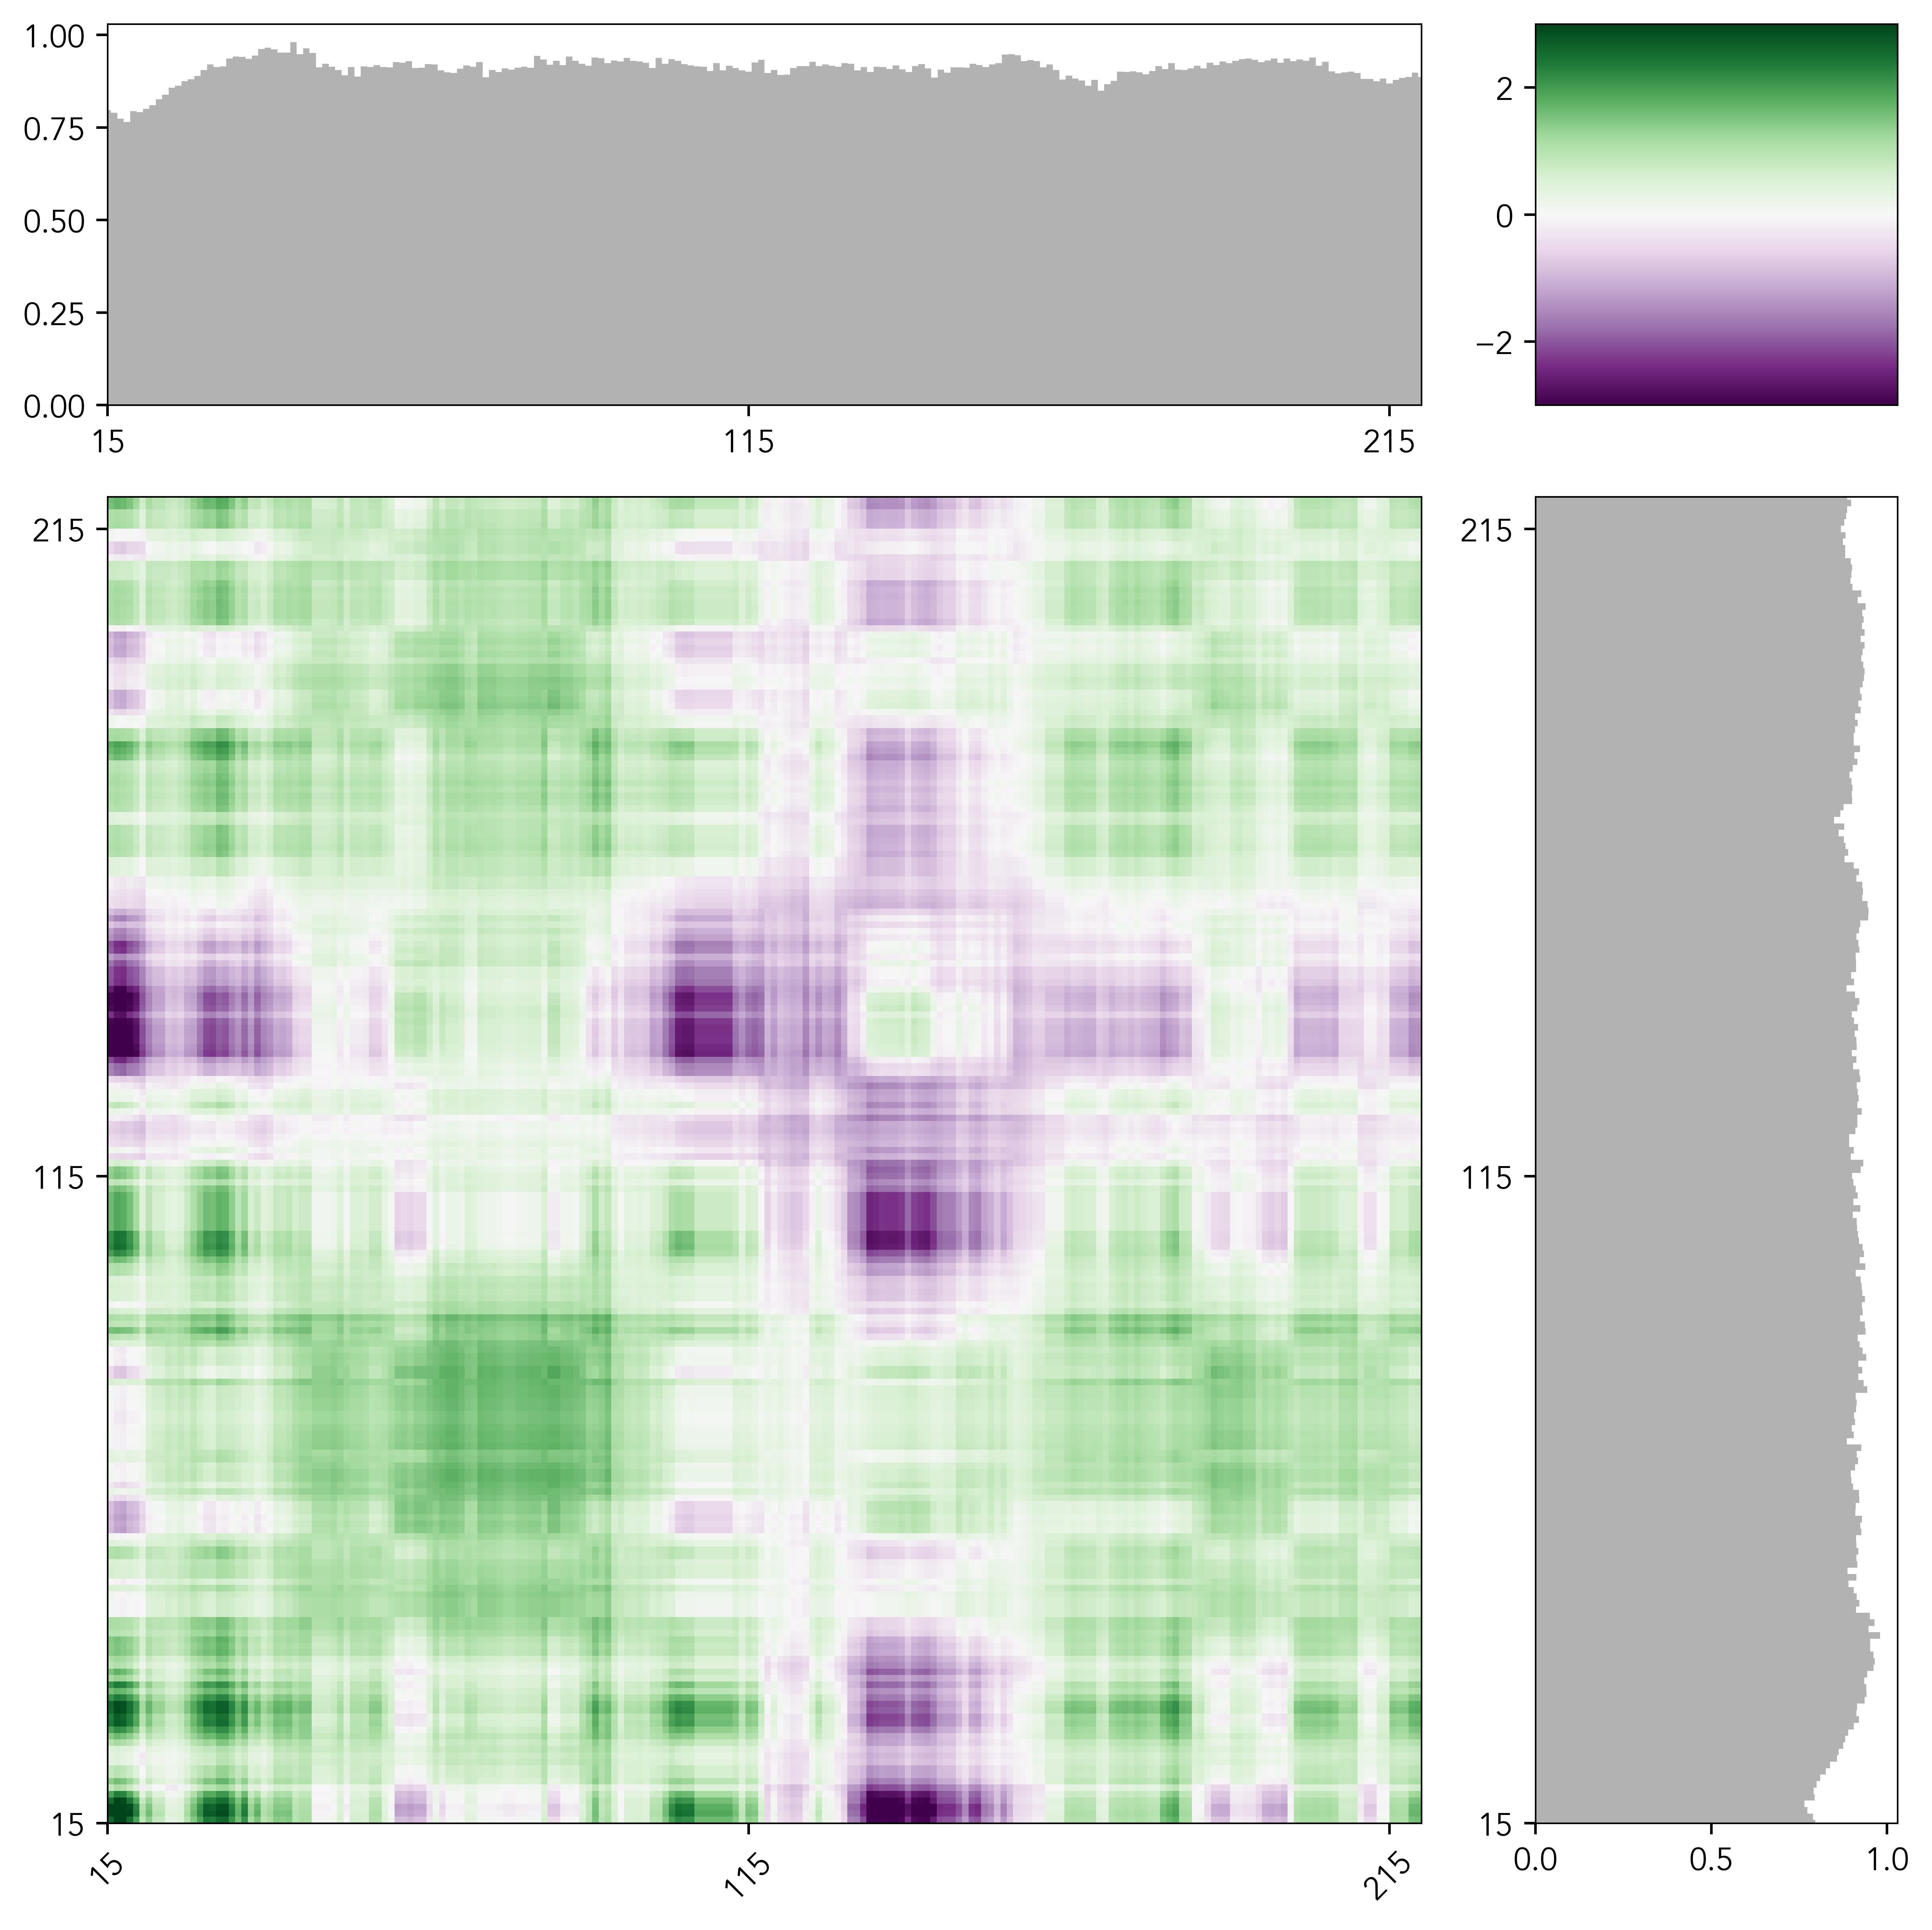

In [16]:

mpipi_frontend.interaction_figure(DDX4_F2A, DDX4_F2A)



(0.0, 1.3)

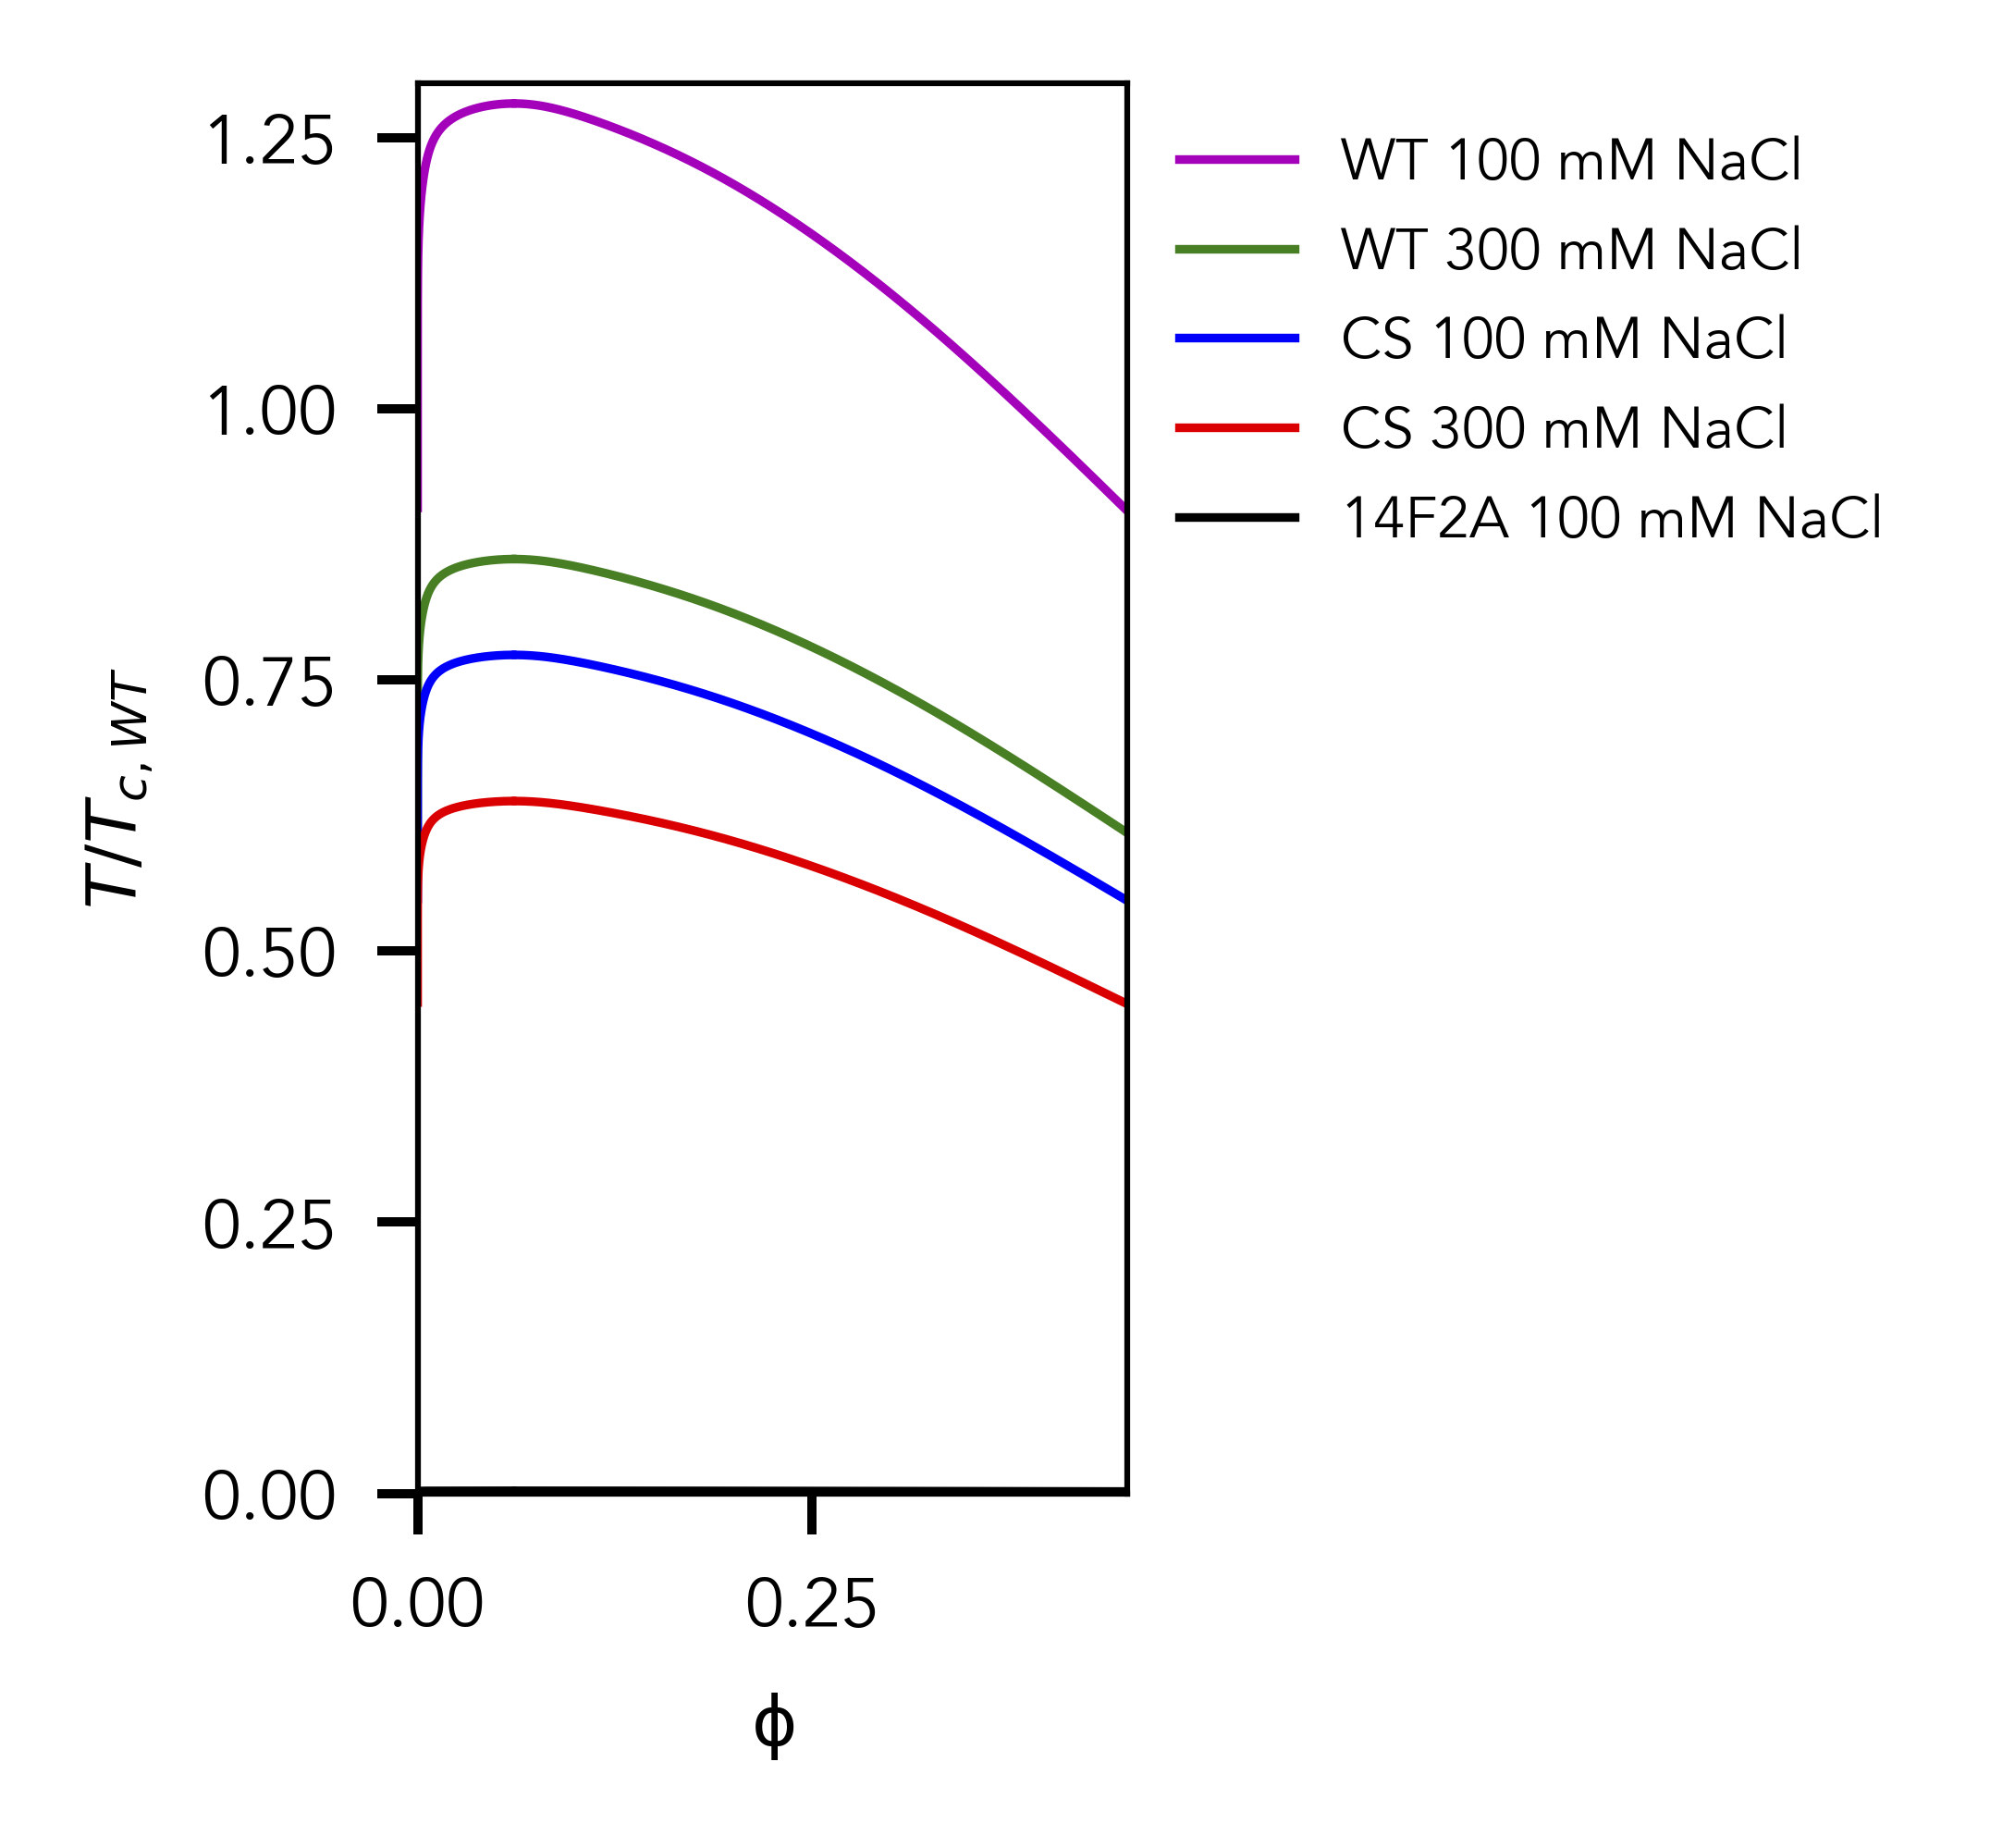

In [193]:
fig = plt.figure(figsize=(1.1, 2.2), dpi=450)




mPiPi_GGv1_model = mPiPi_model('mPiPi_GGv1',salt=0.2)
IMC_object = epsilon_calculation.Interaction_Matrix_Constructor(mPiPi_GGv1_model)

B_base = epsilon_to_FHtheory.return_phase_diagram(DDX4_WT, IMC_object)



# initialize an Mpipi forcefield opbject
mPiPi_GGv1_model = mPiPi_model('mPiPi_GGv1',salt=0.1)
IMC_object = epsilon_calculation.Interaction_Matrix_Constructor(mPiPi_GGv1_model)
B1 = epsilon_to_FHtheory.return_phase_diagram(DDX4_WT, IMC_object)
plt.plot(B1[0], B1[3]/max(B_base[3]), '#A301BA', label='WT 100 mM NaCl', linewidth=0.75)
plt.plot(B1[1], B1[3]/max(B_base[3]), '#A301BA',linewidth=0.75)

mPiPi_GGv1_model = mPiPi_model('mPiPi_GGv1',salt=0.3)
IMC_object = epsilon_calculation.Interaction_Matrix_Constructor(mPiPi_GGv1_model)
B2 = epsilon_to_FHtheory.return_phase_diagram(DDX4_WT, IMC_object)
plt.plot(B2[0], B2[3]/max(B_base[3]), '#487F25', label='WT 300 mM NaCl', linewidth=0.75)
plt.plot(B2[1], B2[3]/max(B_base[3]), '#487F25',linewidth=0.75)

mPiPi_GGv1_model = mPiPi_model('mPiPi_GGv1',salt=0.1)
IMC_object = epsilon_calculation.Interaction_Matrix_Constructor(mPiPi_GGv1_model)
B3 = epsilon_to_FHtheory.return_phase_diagram(DDX4_CS, IMC_object)
plt.plot(B3[0], B3[3]/max(B_base[3]), '#0000FA', label='CS 100 mM NaCl', linewidth=0.75)
plt.plot(B3[1], B3[3]/max(B_base[3]), '#0000FA',linewidth=0.75)

mPiPi_GGv1_model = mPiPi_model('mPiPi_GGv1',salt=0.3)
IMC_object = epsilon_calculation.Interaction_Matrix_Constructor(mPiPi_GGv1_model)
B4 = epsilon_to_FHtheory.return_phase_diagram(DDX4_CS, IMC_object)
plt.plot(B4[0], B4[3]/max(B_base[3]), '#DA0001', label='CS 300 mM NaCl', linewidth=0.75)
plt.plot(B4[1], B4[3]/max(B_base[3]), '#DA0001',linewidth=0.75)


mPiPi_GGv1_model = mPiPi_model('mPiPi_GGv1',salt=0.100)
IMC_object = epsilon_calculation.Interaction_Matrix_Constructor(mPiPi_GGv1_model)
B5 = epsilon_to_FHtheory.return_phase_diagram(DDX4_F2A, IMC_object)
plt.plot(B5[0], B5[3]/max(B_base[3]), 'k', label='14F2A 100 mM NaCl', linewidth=0.75)
plt.plot(B5[1], B5[3]/max(B_base[3]), 'k',linewidth=0.75)


plt.ylabel(r'$T/T_{c,WT}$', fontsize=6)
plt.xlabel(r'$\rm\phi$', fontsize=6)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=5, frameon=False)
plt.xlim([0, 0.45])
plt.ylim([0.0, 1.3])


# ELPs
Peptide from Tosh Chilkoti's group:

Dzuricky, M., Rogers, B. A., Shahid, A., Cremer, P. S. & Chilkoti, A. De novo engineering of intracellular condensates using artificial disordered proteins. Nat. Chem. 12, 814–825 (2020).

(1e-08, 1)

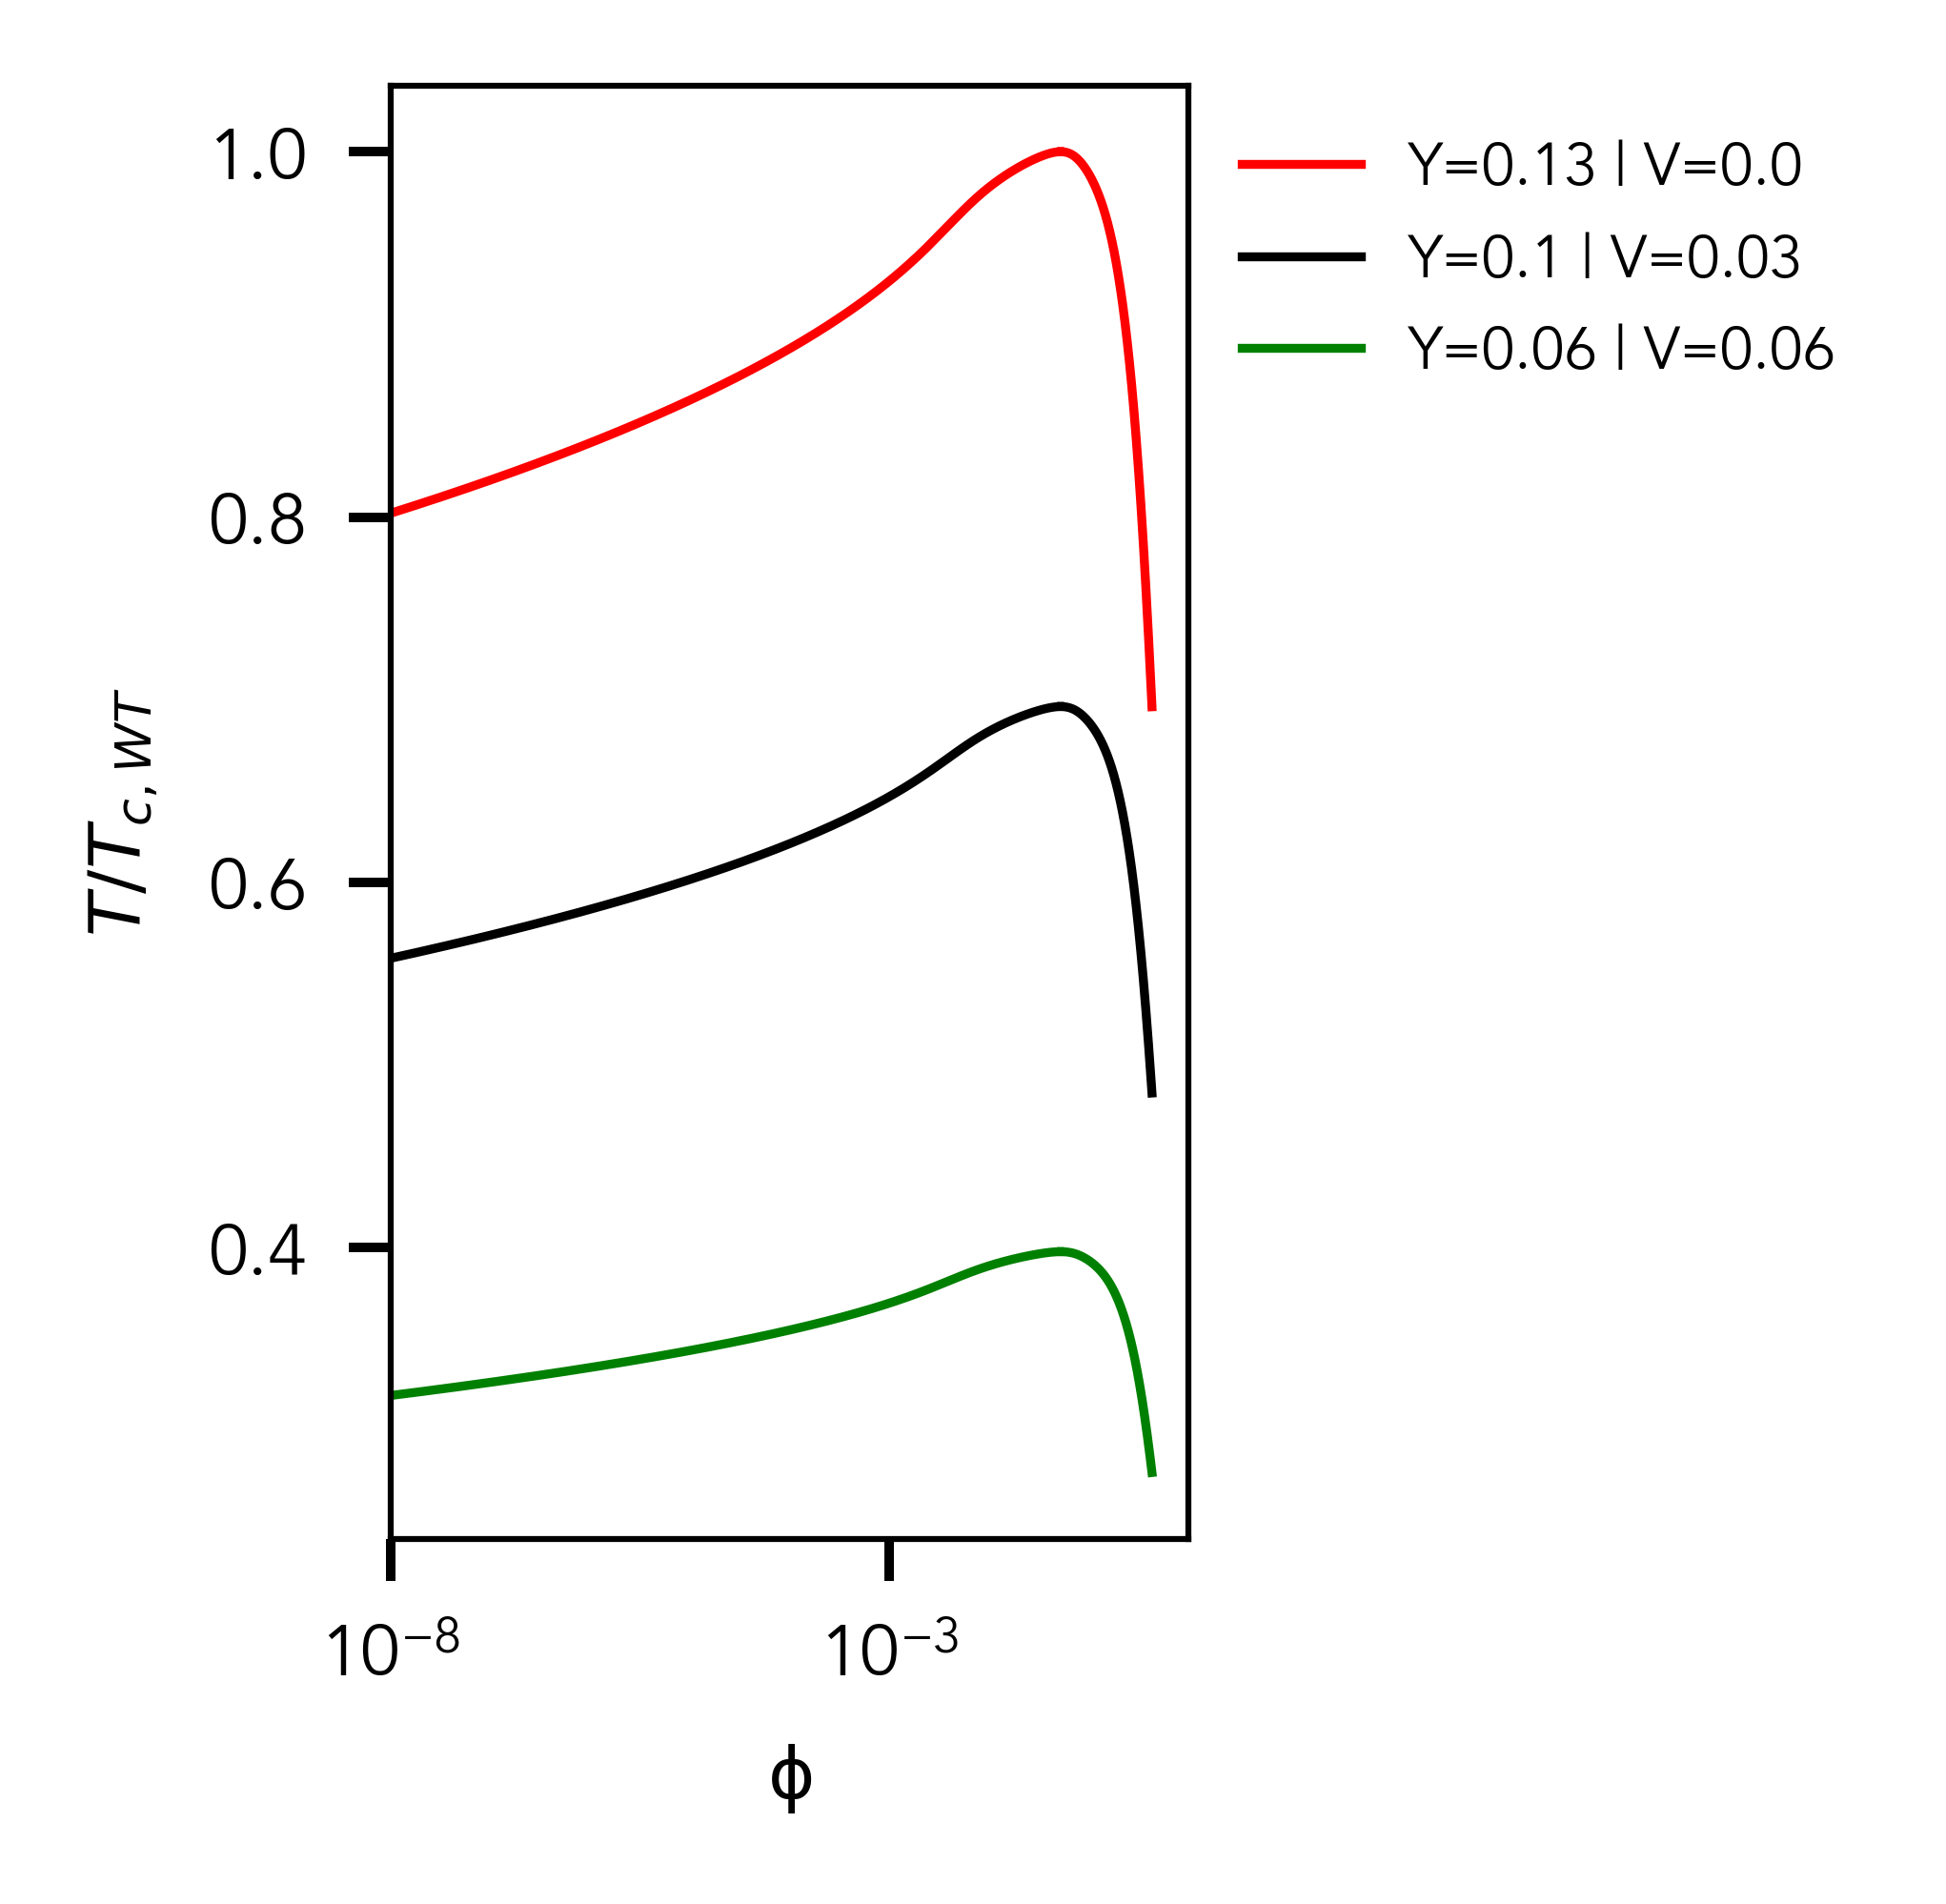

In [18]:
WT40 = 'SKGP' + 'GRGDSPYS'*40 + 'GY'
three_Y7V7 = 'SKGP'+ 'GRGDSPYSGRGDSPYSGRGDSPYSGRGDSPVS'*10 + 'GY'
seven_7_V7 = 'SKGP' + 'GRGDSPYSGRGDSPVS'*20 + 'GY'
moar = 'SKGP' + 'GRGDSPVSGRGDSPVSGRGDSPYSGRGDSPVS'*10 + 'GY'




mPiPi_GGv1_model = mPiPi_model('mPiPi_GGv1',salt=0.1)
IMC_object = epsilon_calculation.Interaction_Matrix_Constructor(mPiPi_GGv1_model)

B_base = epsilon_to_FHtheory.return_phase_diagram(WT40, IMC_object)

fig = plt.figure(figsize=(1.2, 2.2), dpi=450)

B1 = epsilon_to_FHtheory.return_phase_diagram(WT40, IMC_object)

frac_y = WT40.count('Y')/len(WT40)
frac_v = WT40.count('V')/len(WT40)
plt.plot(B1[0], B1[3]/max(B_base[3]), 'r', label=f'Y={round(frac_y,2)} | V={round(frac_v,2)}', linewidth=0.75)
plt.plot(B1[1], B1[3]/max(B_base[3]), 'r', linewidth=0.75)

B2 = epsilon_to_FHtheory.return_phase_diagram(three_Y7V7, IMC_object)

frac_y = three_Y7V7.count('Y')/len(three_Y7V7)
frac_v = three_Y7V7.count('V')/len(three_Y7V7)
plt.plot(B2[0], B2[3]/max(B_base[3]), '-k', label=f'Y={round(frac_y,2)} | V={round(frac_v,2)}', linewidth=0.75)
plt.plot(B2[1], B2[3]/max(B_base[3]), '-k', linewidth=0.75)

B3 = epsilon_to_FHtheory.return_phase_diagram(seven_7_V7, IMC_object)

frac_y = seven_7_V7.count('Y')/len(seven_7_V7)
frac_v = seven_7_V7.count('V')/len(seven_7_V7)

plt.plot(B3[0], B3[3]/max(B_base[3]), '-g', label=f'Y={round(frac_y,2)} | V={round(frac_v,2)}', linewidth=0.75)
plt.plot(B3[1], B3[3]/max(B_base[3]), '-g', linewidth=0.75)

B4 = epsilon_to_FHtheory.return_phase_diagram(moar, IMC_object)

frac_y = moar.count('Y')/len(moar)
frac_v = moar.count('V')/len(moar)

#plt.plot(B4[0], B4[3]/max(B_base[3]), '-g', label=f'Y={round(frac_y,2)} | V={round(frac_v,2)}', linewidth=0.75)

plt.ylabel(r'$T/T_{c,WT}$', fontsize=6)
plt.xlabel(r'$\rm\phi$', fontsize=6)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=5, frameon=False)

plt.xscale('log')
plt.xlim([0.00000001,1])




(1e-08, 1)

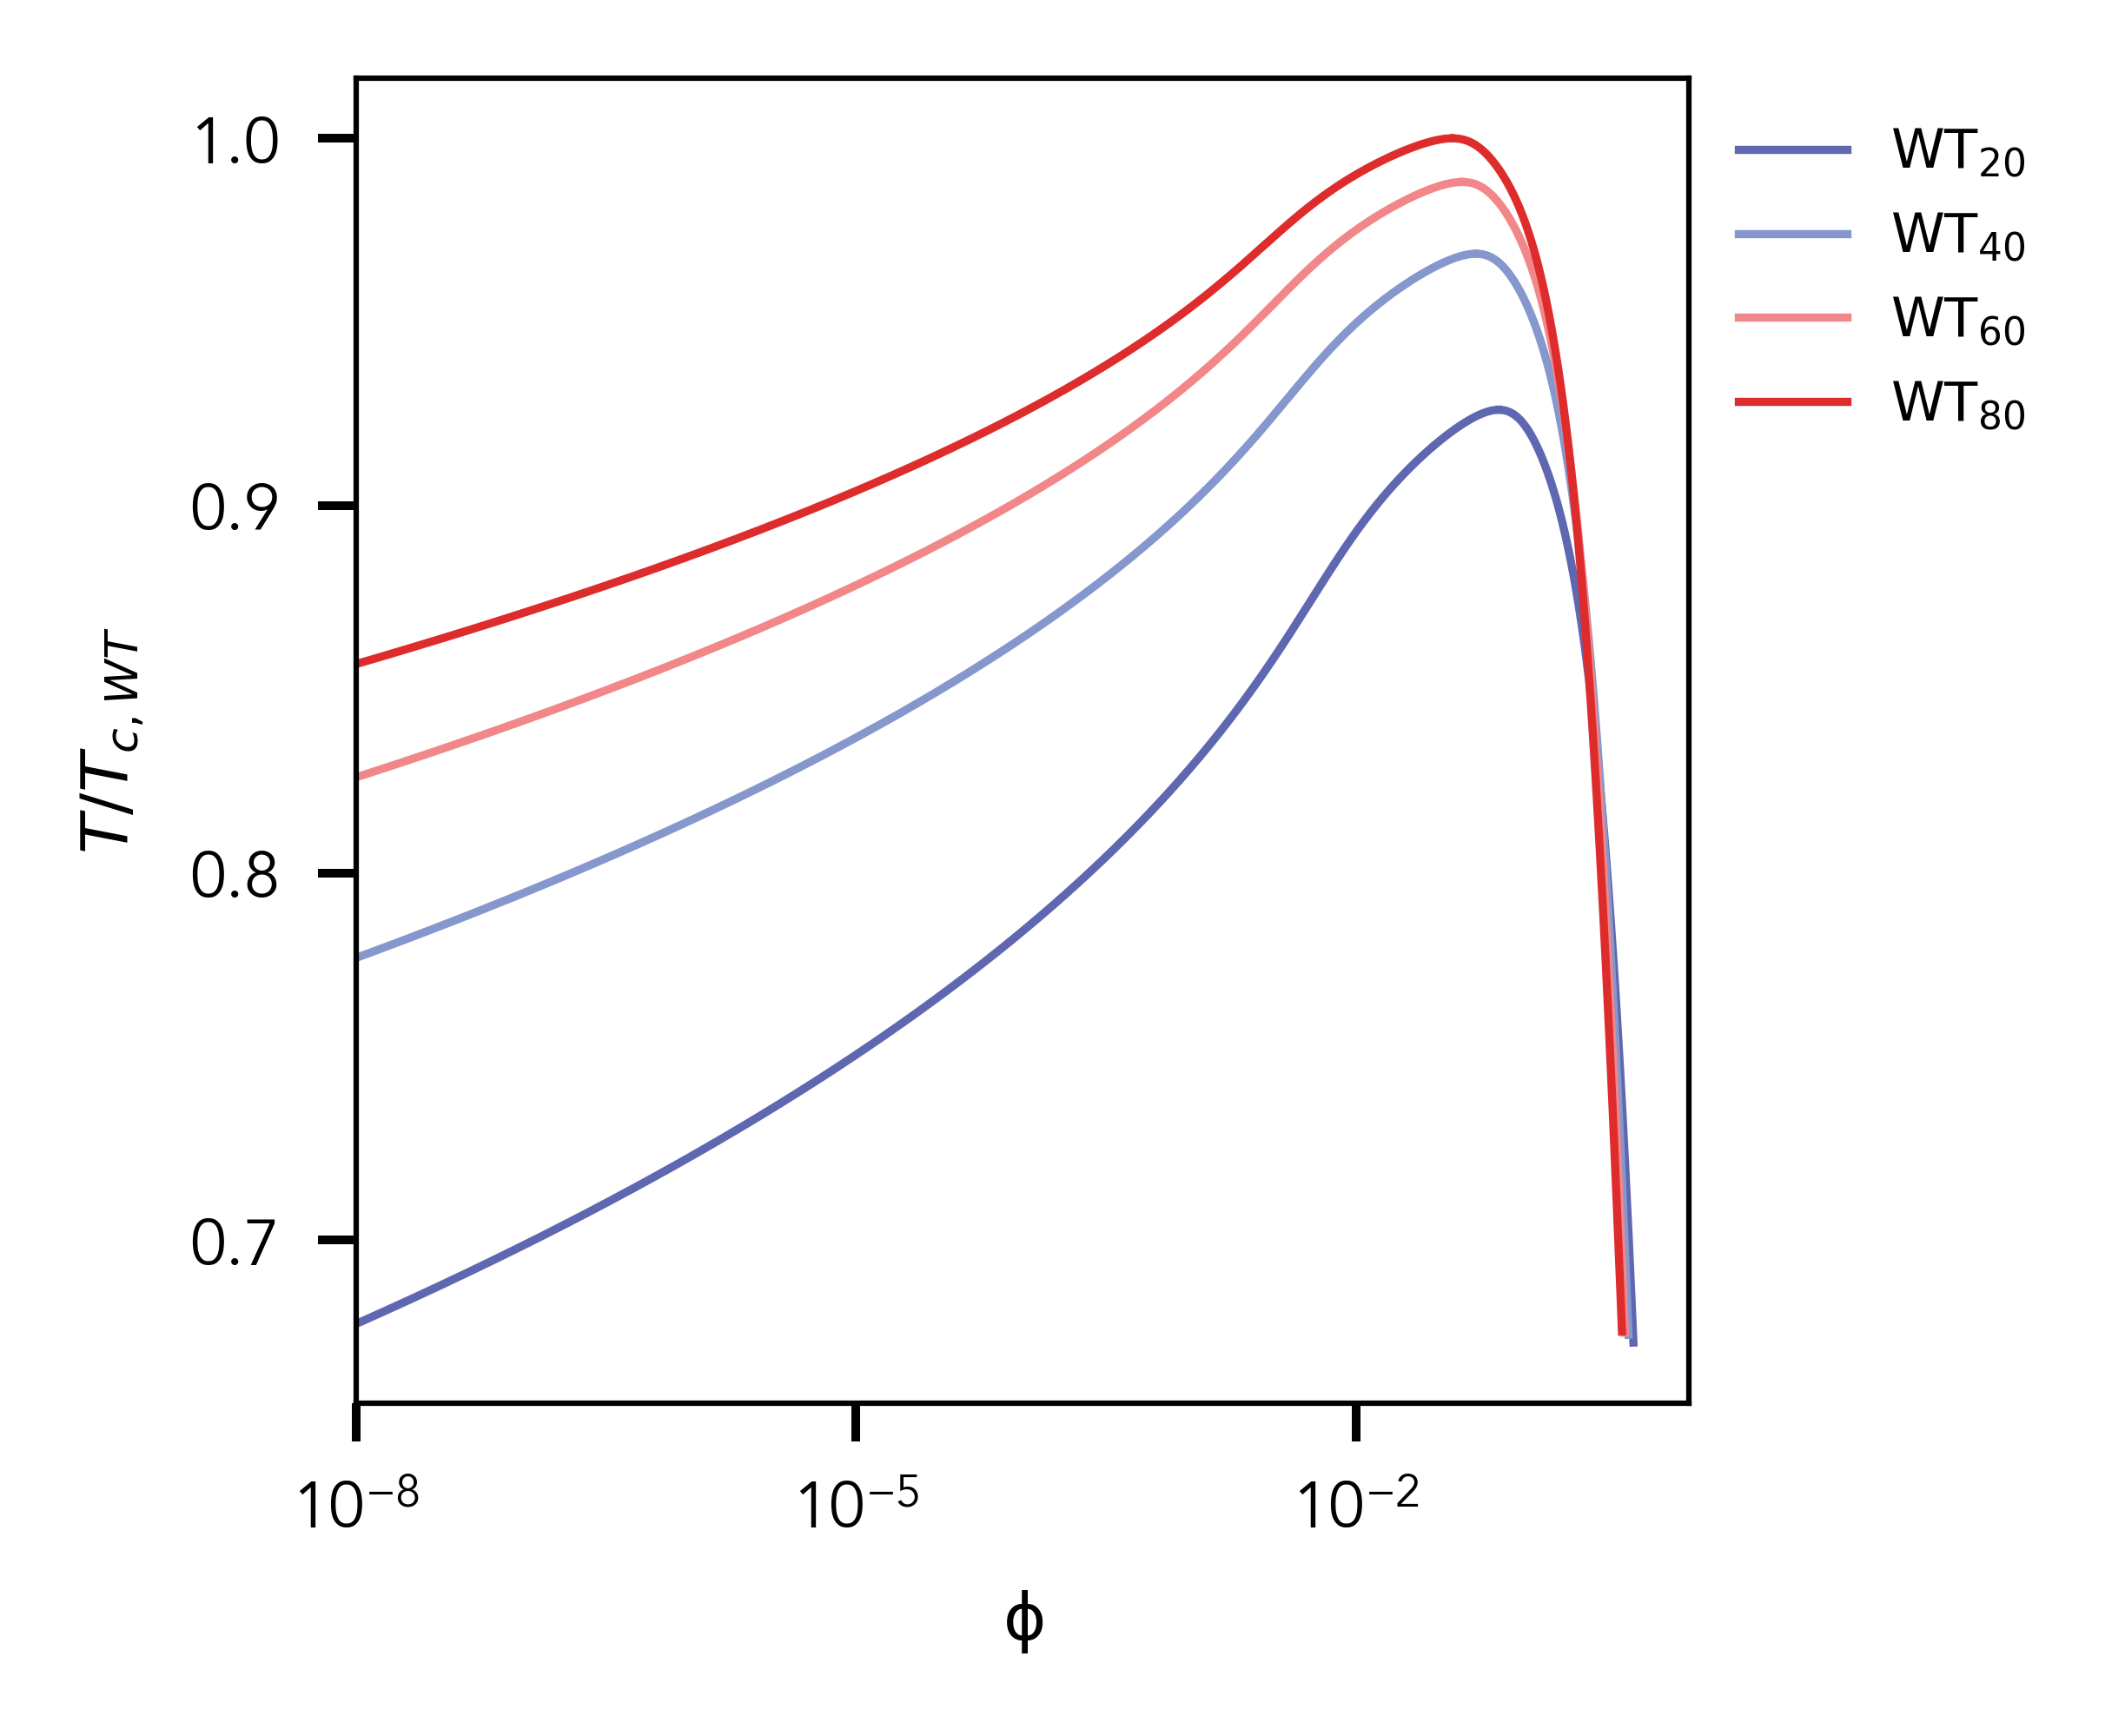

In [19]:
WT20 = 'SKGP' + 'GRGDSPYS'*20 + 'GY'
WT40 = 'SKGP' + 'GRGDSPYS'*40 + 'GY'
WT60 = 'SKGP' + 'GRGDSPYS'*60 + 'GY'
WT80 = 'SKGP' + 'GRGDSPYS'*80 + 'GY'


mPiPi_GGv1_model = mPiPi_model('mPiPi_GGv1',salt=0.1)
IMC_object = epsilon_calculation.Interaction_Matrix_Constructor(mPiPi_GGv1_model)

B_base = epsilon_to_FHtheory.return_phase_diagram(WT80, IMC_object)

fig = plt.figure(figsize=(2.2, 2.2), dpi=450)

B1 = epsilon_to_FHtheory.return_phase_diagram(WT20, IMC_object)

plt.plot(B1[0], B1[3]/max(B_base[3]), '-', color='#5F67B0',  label=r'$\rmWT_{20}$', linewidth=0.75)
plt.plot(B1[1], B1[3]/max(B_base[3]), '-', color='#5F67B0',  linewidth=0.75)

B2 = epsilon_to_FHtheory.return_phase_diagram(WT40, IMC_object)

plt.plot(B2[0], B2[3]/max(B_base[3]), '-', color='#8597CC',  label=r'$\rmWT_{40}$', linewidth=0.75)
plt.plot(B2[1], B2[3]/max(B_base[3]), '-', color='#8597CC',  linewidth=0.75)

B3 = epsilon_to_FHtheory.return_phase_diagram(WT60, IMC_object)

plt.plot(B3[0], B3[3]/max(B_base[3]), '-', color='#F28789', label=r'$\rmWT_{60}$', linewidth=0.75)
plt.plot(B3[1], B3[3]/max(B_base[3]), '-', color='#F28789', linewidth=0.75)

B4 = epsilon_to_FHtheory.return_phase_diagram(WT80, IMC_object)

plt.plot(B4[0], B4[3]/max(B_base[3]), '-', color='#DD2C2B', label=r'$\rmWT_{80}$', linewidth=0.75)
plt.plot(B4[1], B4[3]/max(B_base[3]), '-', color='#DD2C2B', linewidth=0.75)

plt.ylabel(r'$T/T_{c,WT}$', fontsize=6)
plt.xlabel(r'$\rm\phi$', fontsize=6)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=5, frameon=False)

plt.xscale('log')
plt.xlim([0.00000001,1])


